In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import VerticalPitch, FontManager
from mplsoccer import Pitch, FontManager
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import PyPizza, FontManager
from urllib.request import urlopen
from matplotlib.patches import Polygon
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import matplotlib.font_manager as fm
from ipywidgets import widgets
from IPython.display import clear_output
from ipywidgets import widgets





In [2]:
import pandas as pd

# Leer el archivo parquet primero
df_jugadores = pd.read_parquet("../../data_backup/archivos_parquet/eventos_metricas_alaves.parquet")

# Definir los tipos de datos esperados para cada columna
dtypes = {
    'event_id': int,  # Cambiado a int por ser ID
    'event_time': str,
    'match_id': int,
    'team_id': int,
    'player_id': int,
    'xstart': float,
    'ystart': float,
    'attack_direction': str,
    'relative_event.id': int,  # Añadido por ser ID
    'relative_event.event_time': str,
    'relative_event.player_id': int,  # Añadido por ser ID
    'xend': float,
    'yend': float,
    'xg': float,
    'ball_position.x': float,
    'ball_position.y': float,
    'season_id': int,
    'tipo_evento': str,
    'resultado': str,
    'centro': bool,
    'pase_clave': bool,
    'asistencia': bool,
    'subtipo_evento': str,
    'parte_cuerpo': str,
    'liga': str,
    'temporada': str,
    'partido': str,
    'equipo': str,
    'jugador': str,
    'dorsal': str,
    'demarcacion': str,
    'zona_inicio': str,
    'zona_fin': str,
    'id_secuencia': int,
    'longitud_secuencia': int,
    'periodo': int,
    'tramo_partido': str,
    'angulo_pase': int
}

# Identificar automáticamente todas las columnas que contengan '_id' en su nombre
columnas_id = [col for col in df_jugadores.columns if '_id' in col.lower()]
for col in columnas_id:
    dtypes[col] = int

# Todas las columnas que deben ser int (desde angulo_pase hasta el final)
columnas_numericas = [
    'pases_recibidos_perfilado', 'conducciones_carril_izquierdo', 'conducciones_carril_central',
    'conducciones_carril_derecho', 'despejes_zona_area', 'despejes_zona_baja',
    'despejes_zona_media', 'despejes_zona_alta', 'pases_progresivos_inicio',
    'pases_progresivos_creacion', 'pases_progresivos_finalizacion', 'conducciones_inicio',
    'conducciones_creacion', 'conducciones_finalizacion', 'pases_fallidos_campo_propio',
    'pases_fallidos_campo_contrario', 'pases_adelante_inicio', 'pases_adelante_creacion',
    'pases_adelante_finalizacion', 'pases_atras_inicio', 'pases_atras_creacion',
    'pases_atras_finalizacion', 'pases_horizontal_inicio', 'pases_horizontal_creacion',
    'pases_horizontal_finalizacion', 'pases_adelante', 'pases_atras', 'pases_horizontal',
    'cambios_orientacion_exitosos', 'cambios_orientacion_fallidos', 'disparos_a_puerta',
    'disparos_fuera', 'regates_zona_inicio', 'regates_zona_creacion', 'regates_zona_finalizacion',
    'duelos_aereos_ganados_zona_area', 'duelos_aereos_ganados_zona_baja',
    'duelos_aereos_ganados_zona_media', 'duelos_aereos_ganados_zona_alta',
    'duelos_aereos_perdidos_zona_area', 'duelos_aereos_perdidos_zona_baja',
    'duelos_aereos_perdidos_zona_media', 'duelos_aereos_perdidos_zona_alta',
    'duelos_suelo_ganados_zona_area', 'duelos_suelo_ganados_zona_baja',
    'duelos_suelo_ganados_zona_media', 'duelos_suelo_ganados_zona_alta',
    'duelos_suelo_perdidos_zona_area', 'duelos_suelo_perdidos_zona_baja',
    'duelos_suelo_perdidos_zona_media', 'duelos_suelo_perdidos_zona_alta',
    'intercepciones_zona_area', 'intercepciones_zona_baja', 'intercepciones_zona_media',
    'intercepciones_zona_alta', 'recuperaciones_zona_area', 'recuperaciones_zona_baja',
    'recuperaciones_zona_media', 'recuperaciones_zona_alta', 'entradas_ganadas_zona_area',
    'entradas_ganadas_zona_baja', 'entradas_ganadas_zona_media', 'entradas_ganadas_zona_alta',
    'entradas_perdidas_zona_area', 'entradas_perdidas_zona_baja', 'entradas_perdidas_zona_media',
    'entradas_perdidas_zona_alta', 'faltas_zona_area', 'faltas_zona_baja', 'faltas_zona_media',
    'faltas_zona_alta', 'tarjetas_amarillas', 'tarjetas_rojas', 'amonestado', 'faltas_recibidas',
    'fueras_de_juego', 'pases_largos_exitosos', 'pases_largos_fallidos', 'centros_alejados',
    'centros_linea_fondo', 'pases_exitosos_campo_propio', 'pases_exitosos_campo_contrario',
    'gol_a_favor', 'gol_en_contra', 'goles_a_favor', 'goles_en_contra', 'goles_rival'
]

# Añadir todas las columnas numéricas al diccionario de tipos
for col in columnas_numericas:
    dtypes[col] = int

try:
    # Convertir tipos de datos
    for columna in df_jugadores.columns:
        try:
            if columna in dtypes:
                if dtypes[columna] in [int, float]:
                    df_jugadores[columna] = pd.to_numeric(df_jugadores[columna], errors='coerce')
                    df_jugadores[columna] = df_jugadores[columna].fillna(-1)
                df_jugadores[columna] = df_jugadores[columna].astype(dtypes[columna])
                print(f"Columna {columna} convertida a {dtypes[columna]}")
        except Exception as e:
            print(f"No se pudo convertir la columna {columna} a {dtypes[columna]}: {str(e)}")
    
    # Verificar los tipos de datos
    print("\nNuevos tipos de datos:")
    for columna, tipo in df_jugadores.dtypes.items():
        print(f"- {columna}: {tipo}")
        
except Exception as e:
    print(f"Error al leer o procesar el archivo: {str(e)}")

Columna event_id convertida a <class 'int'>
Columna event_time convertida a <class 'str'>
Columna match_id convertida a <class 'int'>
Columna team_id convertida a <class 'int'>
Columna player_id convertida a <class 'int'>
Columna xstart convertida a <class 'float'>
Columna ystart convertida a <class 'float'>
Columna attack_direction convertida a <class 'str'>
Columna relative_event.id convertida a <class 'int'>
Columna relative_event.event_time convertida a <class 'str'>
Columna relative_event.player_id convertida a <class 'int'>
Columna xend convertida a <class 'float'>
Columna yend convertida a <class 'float'>
Columna xg convertida a <class 'float'>
Columna ball_position.x convertida a <class 'float'>
Columna ball_position.y convertida a <class 'float'>
Columna season_id convertida a <class 'int'>
Columna tipo_evento convertida a <class 'str'>
Columna resultado convertida a <class 'str'>
Columna centro convertida a <class 'bool'>
Columna pase_clave convertida a <class 'bool'>
Columna

In [ ]:
df_jugadores.head()

In [3]:


def load_estadisticas_jugadores():
   # Construir la ruta del archivo
   ruta_archivo = '../academyApp/data/archivos_parquet/player_stats_extended_league_all.parquet'
   
   try:
       # Verificar si el archivo existe
       if not os.path.exists(ruta_archivo):
           raise FileNotFoundError(f"No se encontró el archivo: {ruta_archivo}")
       
       # Cargar el archivo Parquet
       df_estadisticas_jugadores = pd.read_parquet(ruta_archivo)
       
       # Información básica sobre el DataFrame
       print(f"DataFrame de estadísticas de jugadores cargado exitosamente:")
       print(f"- Dimensiones: {df_estadisticas_jugadores.shape}")
       print(f"- Columnas: {df_estadisticas_jugadores.columns.tolist()}")
       print("\nInformación detallada:")
       print(df_estadisticas_jugadores.info())
       
       return df_estadisticas_jugadores
   
   except FileNotFoundError as e:
       print(f"Error: No se pudo encontrar el archivo: {e}")
       return None
   except Exception as e:
       print(f"Error inesperado al cargar el archivo: {e}")
       return None

# Cargar los datos
df_estadisticas_jugadores = load_estadisticas_jugadores()

if df_estadisticas_jugadores is not None:
   # Verificar valores nulos
   print("\nValores nulos por columna:")
   print(df_estadisticas_jugadores.isnull().sum())
   
   # Mostrar primeras filas
   print("\nPrimeras filas del DataFrame:")
   print(df_estadisticas_jugadores.head())
   
   # Mostrar resumen estadístico básico
   print("\nResumen estadístico básico:")
   print(df_estadisticas_jugadores.describe())

Error: No se pudo encontrar el archivo: No se encontró el archivo: ../academyApp/data/archivos_parquet/player_stats_extended_league_all.parquet


In [4]:
# Especificar el match_id y player_id deseados 
season_id_filtrado = 4232  # Reemplaza con el season_id que quieras 
player_id_filtrado = 434407  # Reemplaza con el player_id que quieras 

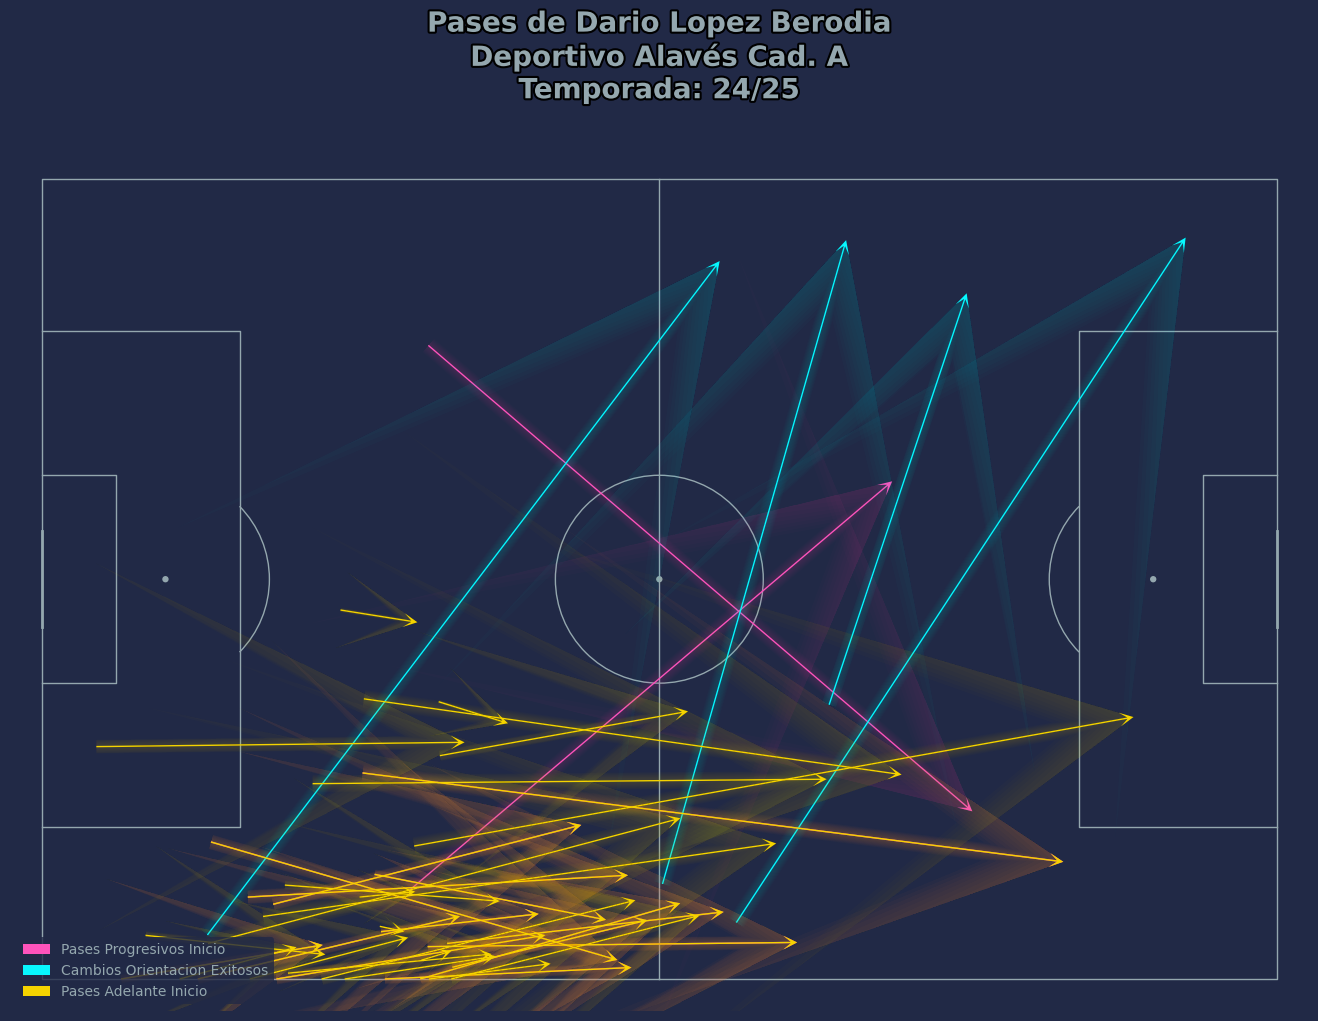

Se encontraron 16 pases progresivos inicio.
Se encontraron 4 cambios orientacion exitosos.
Se encontraron 35 pases adelante inicio.


In [5]:
# Verificar si existen datos para el season_id y player_id especificados
datos_jugador = df_jugadores[df_jugadores['player_id'] == player_id_filtrado]
datos_temporada = df_jugadores[df_jugadores['season_id'] == season_id_filtrado]

if datos_jugador.empty or datos_temporada.empty:
    print("No se encontraron datos para el jugador o temporada especificada.")
    print(f"Jugadores disponibles: {df_jugadores['player_id'].unique()}")
    print(f"Temporadas disponibles: {df_jugadores['season_id'].unique()}")
else:
    # Definir los tipos de pases y sus colores
    tipos_pases = {
        'pases_progresivos_inicio': '#FE53BB',
        'cambios_orientacion_exitosos': '#08F7FE',
        'pases_adelante_inicio': '#F5D300'
    }
    
    # Filtrar los pases para el season_id y player_id específicos
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id_filtrado) &
                           (df_jugadores['player_id'] == player_id_filtrado)].copy()
    
    # Convertir las columnas de coordenadas a float
    coordenadas = ['xstart', 'ystart', 'xend', 'yend']
    for col in coordenadas:
        df_pases[col] = pd.to_numeric(df_pases[col], errors='coerce')
    
    # Verificar que no haya valores NaN en las coordenadas
    df_pases = df_pases.dropna(subset=coordenadas)
    
    if df_pases.empty:
        print("No se encontraron pases válidos para este jugador en esta temporada.")
    else:
        # Configuración de estilos
        BACKGROUND_COLOR = '#212946'
        LINE_COLOR = '#94A7AE'
        LINEWIDTH = 1
        DIFF_LINEWIDTH = 1.2
        NUM_GLOW_LINES = 10
        ALPHA_PITCH_LINE = 0.3
        ALPHA_PASS_LINE = 0.15
        
        # Crear el campo de Wyscout
        pitch = Pitch(pitch_type='wyscout', line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                     linewidth=LINEWIDTH, line_alpha=1, goal_alpha=1)
        
        # Crear la figura y el eje para el campo
        fig, ax = pitch.draw(figsize=(14, 10))
        fig.set_facecolor(BACKGROUND_COLOR)
        
        # Lista para almacenar los elementos de la leyenda
        legend_elements = []
        
        # Dibujar las flechas de los pases para cada tipo
        for tipo_pase, color in tipos_pases.items():
            df_pases_filtrados = df_pases[df_pases[tipo_pase] == 1]
            
            if not df_pases_filtrados.empty:  # Solo dibujar si hay datos
                # Dibujar las flechas principales y guardar la referencia para la leyenda
                arrows = pitch.arrows(df_pases_filtrados['ystart'].astype(float), 
                                   df_pases_filtrados['xstart'].astype(float),
                                   df_pases_filtrados['yend'].astype(float), 
                                   df_pases_filtrados['xend'].astype(float),
                                   ax=ax, color=color, width=LINEWIDTH, headwidth=10, headlength=10,
                                   alpha=1, zorder=1, label=tipo_pase.replace('_', ' ').title())
                
                # Efecto de brillo
                for i in range(1, NUM_GLOW_LINES + 1):
                    pitch.arrows(df_pases_filtrados['ystart'].astype(float), 
                               df_pases_filtrados['xstart'].astype(float),
                               df_pases_filtrados['yend'].astype(float), 
                               df_pases_filtrados['xend'].astype(float),
                               ax=ax, color=color, width=LINEWIDTH + (DIFF_LINEWIDTH * i),
                               headwidth=10 + (i * 2), headlength=10 + (i * 2),
                               alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES, zorder=1)
                
                # Crear elemento personalizado para la leyenda
                from matplotlib.patches import Patch
                legend_elements.append(Patch(facecolor=color, 
                                          label=tipo_pase.replace('_', ' ').title(),
                                          alpha=1))
        
        # Obtener información adicional
        nombre_jugador = datos_jugador['jugador'].iloc[0] if not datos_jugador.empty else "Jugador desconocido"
        nombre_equipo = datos_jugador['equipo'].iloc[0] if not datos_jugador.empty else "Equipo desconocido"
        temporada = datos_temporada['temporada'].iloc[0] if not datos_temporada.empty else "Temporada desconocida"
        
        # Añadir título
        title_text = f'Pases de {nombre_jugador}\n{nombre_equipo}\nTemporada: {temporada}'
        ax.text(0.5, 1.05, title_text, color=LINE_COLOR, fontsize=20, ha='center', va='bottom',
                transform=ax.transAxes, fontweight='bold',
                path_effects=[path_effects.Stroke(linewidth=3, foreground='black'),
                            path_effects.Normal()])
        
        # Añadir leyenda solo si hay elementos
        if legend_elements:
            ax.legend(handles=legend_elements, loc='lower left', 
                     facecolor=BACKGROUND_COLOR, edgecolor='none',
                     fontsize=10, labelcolor=LINE_COLOR)
        
        # Mostrar la gráfica
        plt.tight_layout()
        plt.show()
        
        # Imprimir estadísticas
        for tipo_pase in tipos_pases:
            num_pases = df_pases[df_pases[tipo_pase] == 1].shape[0]
            print(f"Se encontraron {num_pases} {tipo_pase.replace('_', ' ')}.")

In [6]:
# Verificar si existen datos para el season_id y player_id especificados datos_jugador = df_jugadores[df_jugadores['player_id'] == player_id_filtrado] datos_temporada = df_jugadores[df_jugadores['season_id'] == season_id_filtrado]  if datos_jugador.empty or datos_temporada.empty:     print("No se encontraron datos para el jugador o temporada especificada.")     print(f"Jugadores disponibles: {df_jugadores['player_id'].unique()}")     print(f"Temporadas disponibles: {df_jugadores['season_id'].unique()}") else:     # Definir los tipos de pases y sus colores     tipos_pases = {         'pases_progresivos_inicio': '#FE53BB',         'cambios_orientacion_exitosos': '#08F7FE',         'pases_adelante_inicio': '#F5D300'     }      # Filtrar los pases para el season_id y player_id específicos     df_pases = df_jugadores[(df_jugadores['season_id'] == season_id_filtrado) &                             (df_jugadores['player_id'] == player_id_filtrado)]      if df_pases.empty:         print("No se encontraron pases para este jugador en esta temporada.")     else:         # Configuración de estilos         BACKGROUND_COLOR = '#212946'         LINE_COLOR = '#94A7AE'         LINEWIDTH = 1         DIFF_LINEWIDTH = 1.2         NUM_GLOW_LINES = 10         ALPHA_PITCH_LINE = 0.3         ALPHA_PASS_LINE = 0.15          # Crear el campo de Wyscout         pitch = Pitch(pitch_type='wyscout', line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,                       linewidth=LINEWIDTH, line_alpha=1, goal_alpha=1)          # Crear la figura y el eje para el campo         fig, ax = pitch.draw(figsize=(14, 10))         fig.set_facecolor(BACKGROUND_COLOR)          # Dibujar las flechas de los pases para cada tipo         for tipo_pase, color in tipos_pases.items():             df_pases_filtrados = df_pases[df_pases[tipo_pase] == 1]                          # Dibujar las flechas de los pases             pitch.arrows(df_pases_filtrados['ystart'], df_pases_filtrados['xstart'],                          df_pases_filtrados['yend'], df_pases_filtrados['xend'],                          ax=ax, color=color, width=LINEWIDTH, headwidth=10, headlength=10,                          alpha=1, zorder=1, label=tipopase.replace('', ' ').title())              # Efecto de brillo             for i in range(1, NUM_GLOW_LINES + 1):                 pitch.arrows(df_pases_filtrados['ystart'], df_pases_filtrados['xstart'],                              df_pases_filtrados['yend'], df_pases_filtrados['xend'],                              ax=ax, color=color, width=LINEWIDTH + (DIFF_LINEWIDTH * i),                              headwidth=10 + (i * 2), headlength=10 + (i * 2),                              alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES, zorder=1)          # Obtener información adicional         nombre_jugador = datos_jugador['jugador'].iloc[0] if not datos_jugador.empty else "Jugador desconocido"         nombre_equipo = datos_jugador['equipo'].iloc[0] if not datos_jugador.empty else "Equipo desconocido"         temporada = datos_temporada['temporada'].iloc[0] if not datos_temporada.empty else "Temporada desconocida"          # Añadir título         title_text = f'Pases de {nombre_jugador}\n{nombre_equipo}\nTemporada: {temporada}'         ax.text(0.5, 1.05, title_text, color=LINE_COLOR, fontsize=20, ha='center', va='bottom',                 transform=ax.transAxes, fontweight='bold',                  path_effects=[path_effects.Stroke(linewidth=3, foreground='black'),                               path_effects.Normal()])          # Añadir leyenda         ax.legend(loc='lower left', facecolor=BACKGROUND_COLOR, edgecolor='none',                    fontsize=10, labelcolor=LINE_COLOR)          # Mostrar la gráfica         plt.tight_layout()         plt.show()          # Imprimir estadísticas         for tipo_pase in tipos_pases:             num_pases = df_pases[df_pases[tipo_pase] == 1].shape[0]             print(f"Se encontraron {num_pases} {tipopase.replace('', ' ')}.")



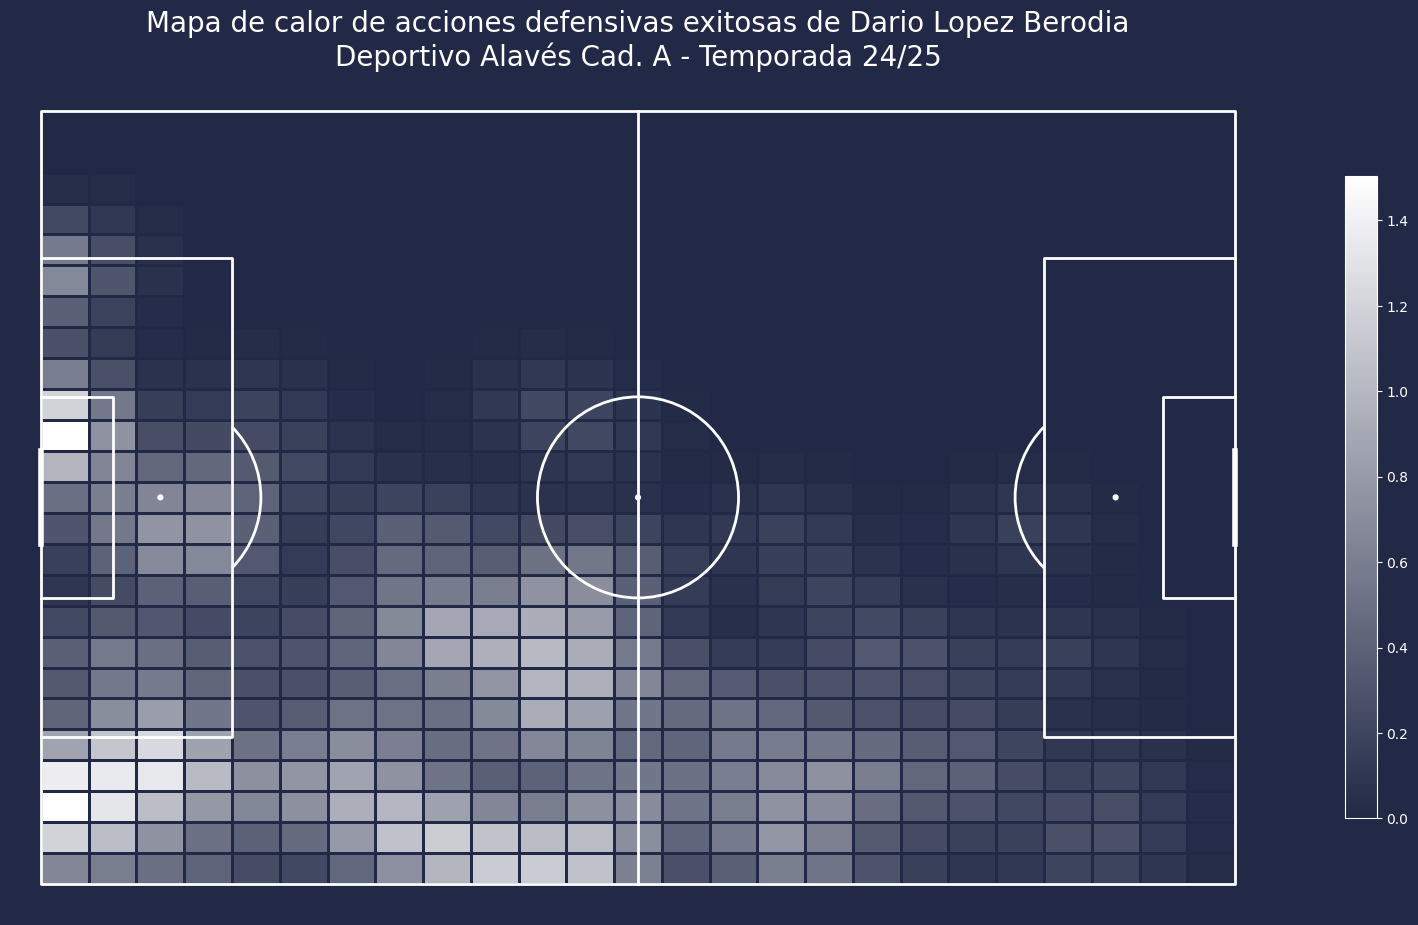

Estadísticas para Dario Lopez Berodia (Deportivo Alavés Cad. A) en la temporada 24/25:
Total de acciones defensivas: 147
Despejes Zona Area: 15
Despejes Zona Baja: 23
Despejes Zona Media: 16
Despejes Zona Alta: 2
Duelos Aereos Ganados Zona Area: 1
Duelos Aereos Ganados Zona Baja: 5
Duelos Aereos Ganados Zona Media: 3
Duelos Aereos Ganados Zona Alta: 2
Duelos Suelo Ganados Zona Area: 2
Duelos Suelo Ganados Zona Baja: 3
Duelos Suelo Ganados Zona Media: 1
Duelos Suelo Ganados Zona Alta: 2
Intercepciones Zona Area: 0
Intercepciones Zona Baja: 4
Intercepciones Zona Media: 3
Intercepciones Zona Alta: 2
Recuperaciones Zona Area: 3
Recuperaciones Zona Baja: 11
Recuperaciones Zona Media: 34
Recuperaciones Zona Alta: 6
Entradas Ganadas Zona Area: 0
Entradas Ganadas Zona Baja: 5
Entradas Ganadas Zona Media: 2
Entradas Ganadas Zona Alta: 2


In [7]:
# Lista de columnas para acciones defensivas
acciones_defensivas = [
    'despejes_zona_area', 'despejes_zona_baja', 'despejes_zona_media', 'despejes_zona_alta',
    'duelos_aereos_ganados_zona_area', 'duelos_aereos_ganados_zona_baja',
    'duelos_aereos_ganados_zona_media', 'duelos_aereos_ganados_zona_alta',
    'duelos_suelo_ganados_zona_area', 'duelos_suelo_ganados_zona_baja',
    'duelos_suelo_ganados_zona_media', 'duelos_suelo_ganados_zona_alta',
    'intercepciones_zona_area', 'intercepciones_zona_baja',
    'intercepciones_zona_media', 'intercepciones_zona_alta',
    'recuperaciones_zona_area', 'recuperaciones_zona_baja',
    'recuperaciones_zona_media', 'recuperaciones_zona_alta',
    'entradas_ganadas_zona_area', 'entradas_ganadas_zona_baja',
    'entradas_ganadas_zona_media', 'entradas_ganadas_zona_alta'
]

# Filtrar los datos para el jugador y temporada específicos
df_defensivo = df_jugadores[(df_jugadores['season_id'] == season_id_filtrado) &
                            (df_jugadores['player_id'] == player_id_filtrado)]

if df_defensivo.empty:
    print("No se encontraron datos para este jugador en esta temporada.")
else:
    # Crear una lista de coordenadas para todas las acciones defensivas
    x_coords = []
    y_coords = []
    for accion in acciones_defensivas:
        mask = df_defensivo[accion] == 1
        x_coords.extend(df_defensivo.loc[mask, 'xstart'])
        y_coords.extend(df_defensivo.loc[mask, 'ystart'])

    # Configuración de estilos
    BACKGROUND_COLOR = '#212946'
    LINE_COLOR = '#ffffff'
    TEXT_COLOR = '#ffffff'

    # Crear el campo de Wyscout
    pitch = Pitch(pitch_type='wyscout', pitch_color=BACKGROUND_COLOR, line_color=LINE_COLOR,
                  stripe=False, line_zorder=2)

    # Crear la figura y el eje para el campo
    fig, ax = pitch.draw(figsize=(16, 11))
    fig.set_facecolor(BACKGROUND_COLOR)

    # Calcular el heatmap
    bin_statistic = pitch.bin_statistic(y_coords, x_coords, statistic='count', bins=(25, 25))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

    # Crear un mapa de colores personalizado
    cmap = LinearSegmentedColormap.from_list("Custom", ['#212946', '#ffffff'], N=256)

    # Dibujar el heatmap
    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, edgecolors='#212946')

    # Añadir la barra de color
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
    cbar.outline.set_edgecolor(LINE_COLOR)
    cbar.ax.yaxis.set_tick_params(color=LINE_COLOR)
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=LINE_COLOR)

    # Añadir título
    player_name = df_defensivo['jugador'].iloc[0] if not df_defensivo.empty else "Jugador desconocido"
    equipo = df_defensivo['equipo'].iloc[0] if not df_defensivo.empty else "Equipo desconocido"
    temporada = df_defensivo['temporada'].iloc[0] if not df_defensivo.empty else "Temporada desconocida"

    title = f'Mapa de calor de acciones defensivas exitosas de {player_name}\n{equipo} - Temporada {temporada}'
    ax.set_title(title, fontsize=20, color=TEXT_COLOR, pad=10)

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

    # Imprimir estadísticas
    total_acciones = sum(len(df_defensivo[df_defensivo[accion] == 1]) for accion in acciones_defensivas)
    print(f"Estadísticas para {player_name} ({equipo}) en la temporada {temporada}:")
    print(f"Total de acciones defensivas: {total_acciones}")
    for accion in acciones_defensivas:
        num_acciones = df_defensivo[df_defensivo[accion] == 1].shape[0]
        print(f"{accion.replace('_', ' ').title()}: {num_acciones}")

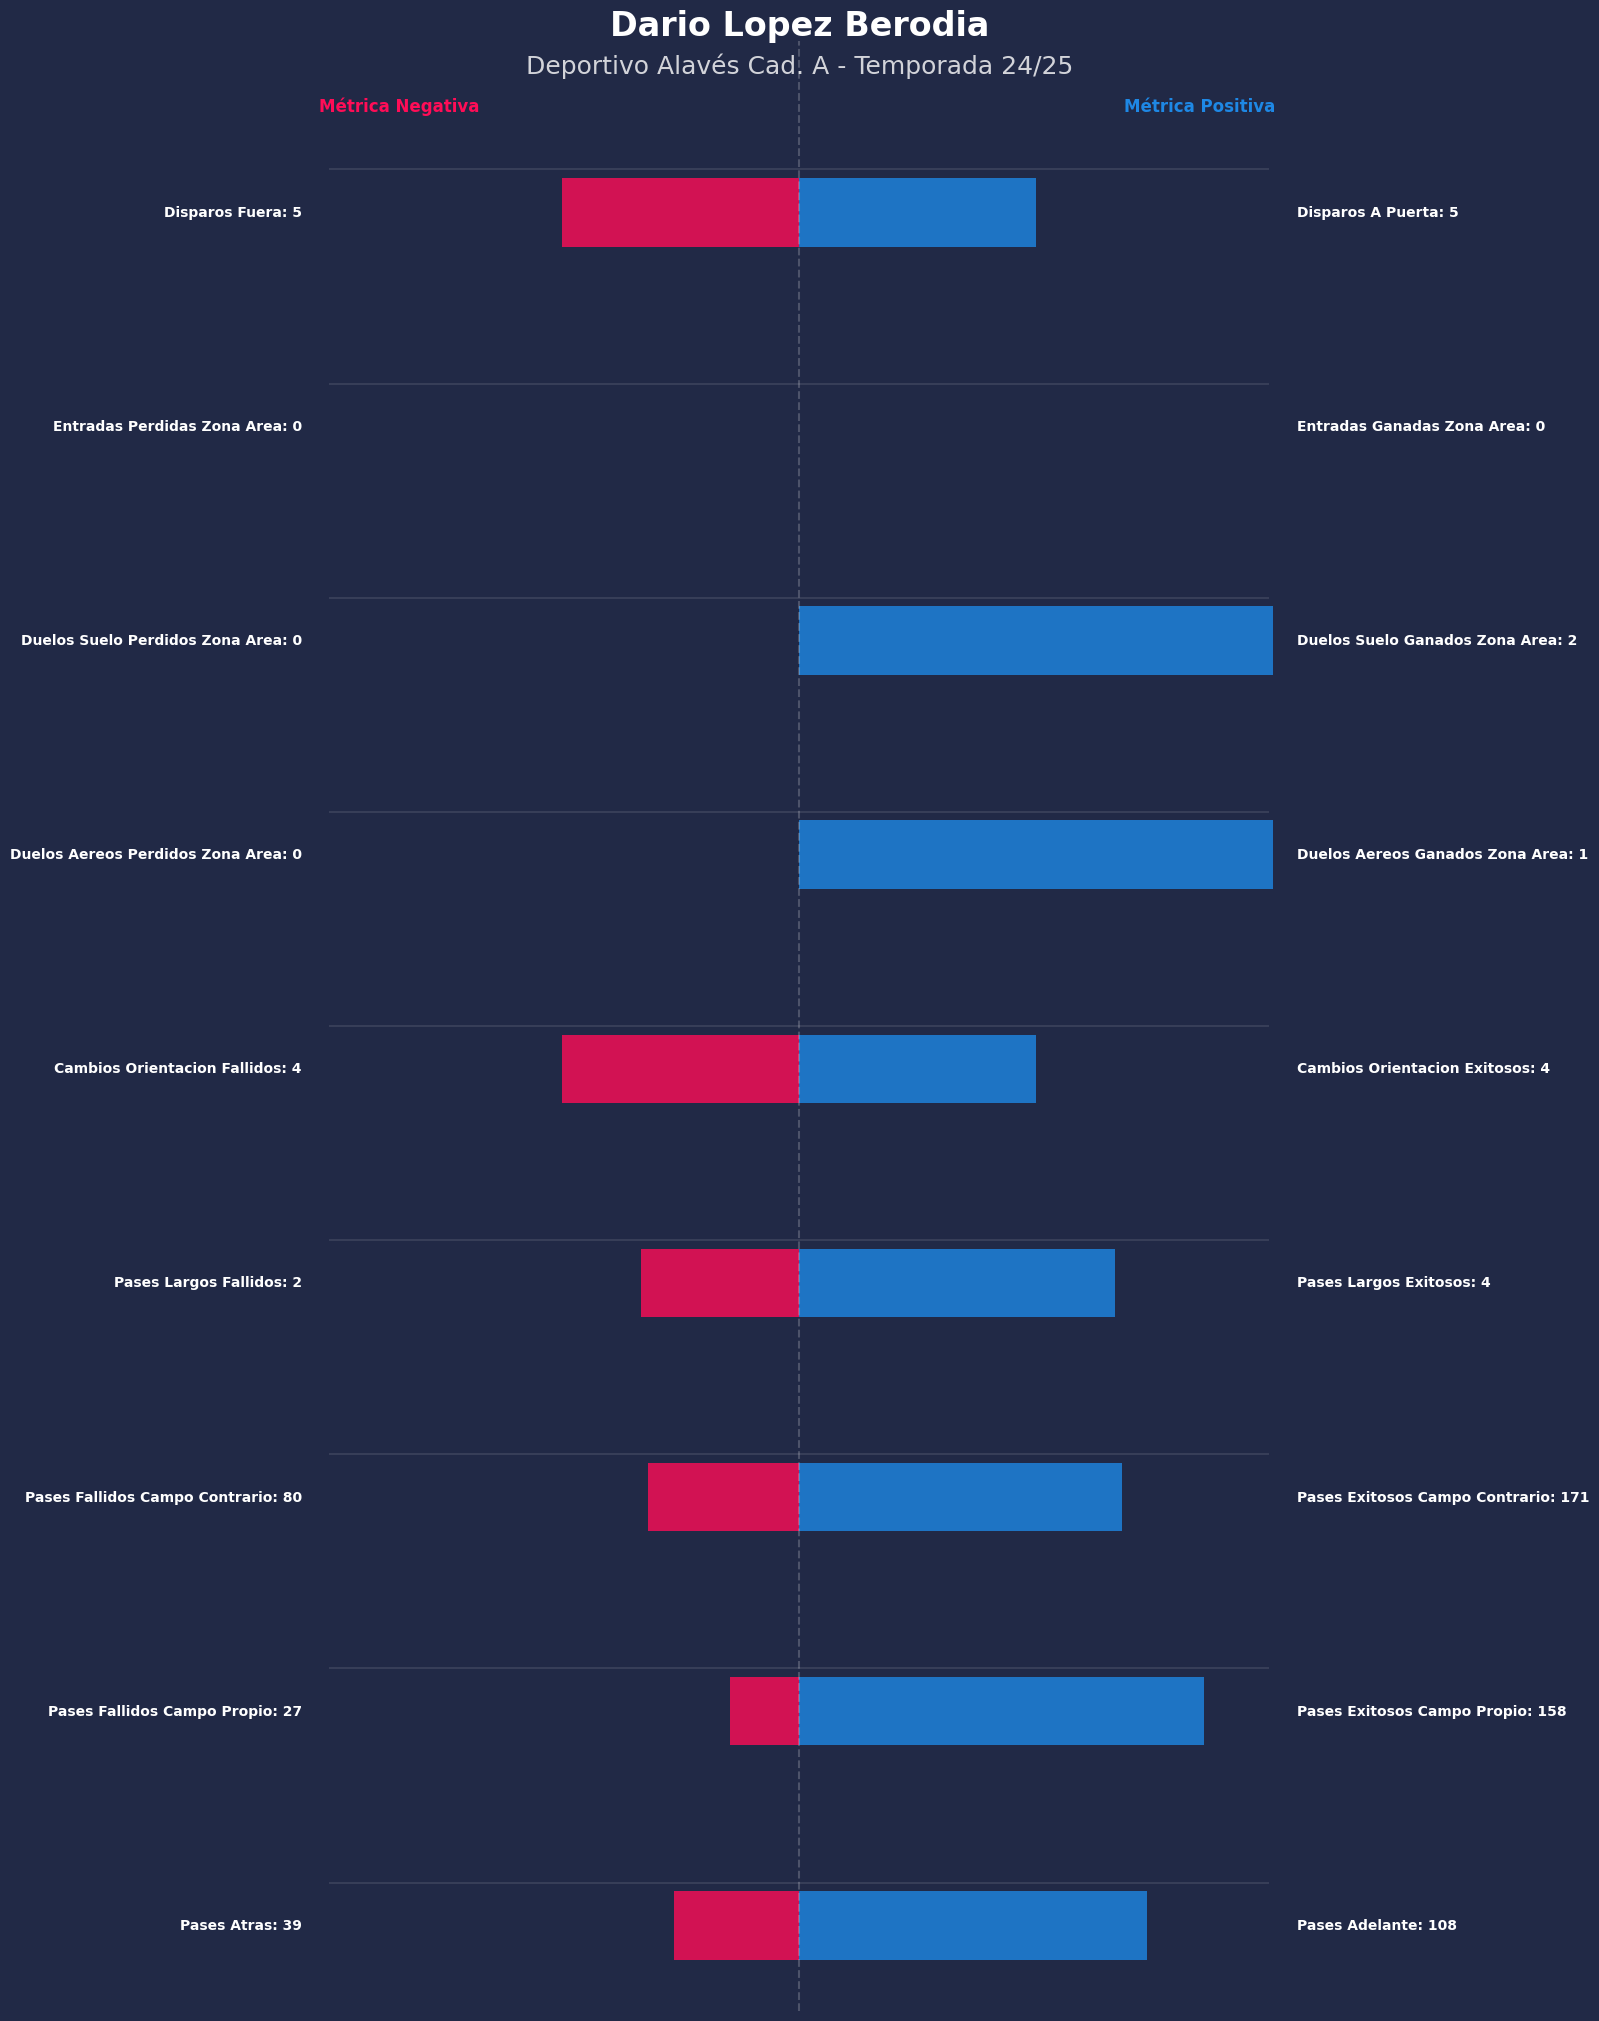

In [8]:


def plot_player_metrics_modern(df_jugadores, player_id, season_id):
    # Filtrar datos para el jugador y temporada específicos
    df_jugador = df_jugadores[(df_jugadores['player_id'] == player_id) & 
                              (df_jugadores['season_id'] == season_id)]
    
    if df_jugador.empty:
        print(f"No se encontraron datos para el jugador ID {player_id} en la temporada ID {season_id}.")
        return

    player_name = df_jugador['jugador'].iloc[0]
    equipo = df_jugador['equipo'].iloc[0]
    temporada = df_jugador['temporada'].iloc[0]

    # Configuración de colores
    bg_color = '#212946'
    line_color = '#ffffff'
    bar_color1 = '#1e88e5'  # Azul para métricas positivas
    bar_color2 = '#ff0d57'  # Rojo para métricas negativas o contrastantes

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(16, 20), facecolor=bg_color)
    
    # Configurar el eje
    ax.set_facecolor(bg_color)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=line_color, which='both', length=0)

    # Definir pares de métricas a comparar
    metric_pairs = [
        ('pases_adelante', 'pases_atras'),
        ('pases_exitosos_campo_propio', 'pases_fallidos_campo_propio'),
        ('pases_exitosos_campo_contrario', 'pases_fallidos_campo_contrario'),
        ('pases_largos_exitosos', 'pases_largos_fallidos'),
        ('cambios_orientacion_exitosos', 'cambios_orientacion_fallidos'),
        ('duelos_aereos_ganados_zona_area', 'duelos_aereos_perdidos_zona_area'),
        ('duelos_suelo_ganados_zona_area', 'duelos_suelo_perdidos_zona_area'),
        ('entradas_ganadas_zona_area', 'entradas_perdidas_zona_area'),
        ('disparos_a_puerta', 'disparos_fuera')
    ]

    # Preparar datos para la gráfica
    y_positions = np.arange(len(metric_pairs)) * 2.5
    bar_height = 0.8

    for i, (metric1, metric2) in enumerate(metric_pairs):
        value1 = df_jugador[metric1].sum()
        value2 = df_jugador[metric2].sum()
        total = value1 + value2
        
        # Normalizar valores
        norm_value1 = value1 / total * 100 if total > 0 else 0
        norm_value2 = value2 / total * 100 if total > 0 else 0

        # Dibujar barras
        ax.barh(y_positions[i], norm_value1, height=bar_height, color=bar_color1, alpha=0.8)
        ax.barh(y_positions[i], -norm_value2, height=bar_height, color=bar_color2, alpha=0.8)

        # Añadir etiquetas
        ax.text(105, y_positions[i], f"{metric1.replace('_', ' ').title()}: {value1}", 
                va='center', ha='left', color=line_color, fontsize=10, fontweight='bold')
        ax.text(-105, y_positions[i], f"{metric2.replace('_', ' ').title()}: {value2}", 
                va='center', ha='right', color=line_color, fontsize=10, fontweight='bold')

    # Configurar límites y etiquetas del eje
    ax.set_xlim(-110, 110)
    ax.set_ylim(-1, max(y_positions) + 2)
    ax.set_xticks([])
    ax.set_yticks([])

    # Añadir título con estilo moderno
    fig.text(0.5, 1, f"{player_name}", ha='center', va='center', 
             color=line_color, fontsize=24, fontweight='bold')
    fig.text(0.5, 0.98, f"{equipo} - Temporada {temporada}", ha='center', va='center', 
             color=line_color, fontsize=18, alpha=0.8)

    # Añadir leyenda moderna
    fig.text(0.25, 0.96, "Métrica Negativa", color=bar_color2, fontsize=12, ha='center', va='center', fontweight='bold')
    fig.text(0.75, 0.96, "Métrica Positiva", color=bar_color1, fontsize=12, ha='center', va='center', fontweight='bold')

    # Añadir líneas decorativas
    ax.axvline(x=0, color=line_color, alpha=0.2, linestyle='--')
    for y in y_positions:
        ax.axhline(y=y+bar_height/2+0.1, color=line_color, alpha=0.1, xmin=0.05, xmax=0.95)

    plt.tight_layout()
    plt.show()



plot_player_metrics_modern(df_jugadores, player_id_filtrado, season_id_filtrado)

In [9]:
# Cargar fuentes
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf')

In [10]:


# Cargar fuentes personalizadas
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf')

# Definir colores como variables globales
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR = '#001F3F'
TEXT_COLOR = '#001F3F'
HIGHLIGHT_COLOR = '#4BB3FD'


def create_stylish_six_panel_subplot(df_jugadores, player_id_filtrado, season_id_filtrado):
    # Verificar si existen datos para el season_id y player_id especificados
    datos_jugador = df_jugadores[df_jugadores['player_id'] == player_id_filtrado]
    datos_temporada = df_jugadores[df_jugadores['season_id'] == season_id_filtrado]

    if datos_jugador.empty or datos_temporada.empty:
        print("No se encontraron datos para el jugador o temporada especificada.")
        return

    # Crear la figura principal
    fig = plt.figure(figsize=(30, 30), facecolor=BACKGROUND_COLOR)
    
    # Añadir el escudo del Alavés
    escudo = plt.imread('images/escudo_alaves.png')
    escudo_box = OffsetImage(escudo, zoom=0.65)
    ab_escudo = AnnotationBbox(escudo_box, (0.67, 1), xycoords='figure fraction', frameon=False)
    fig.add_artist(ab_escudo)

    # Añadir la imagen del jugador
    player_image_path = f"{player_id_filtrado}.png"
    if os.path.exists(player_image_path):
        player_image = plt.imread(player_image_path)
        player_box = OffsetImage(player_image, zoom=0.65)
        ab_player = AnnotationBbox(player_box, (0.16, 1.01), xycoords='figure fraction', frameon=False)
        fig.add_artist(ab_player)
    else:
        print(f"Advertencia: No se encontró la imagen del jugador {player_image_path}")

    # Añadir la imagen SDC.png
    sdc_image_path = "images/SDC.png"
    if os.path.exists(sdc_image_path):
        sdc_image = plt.imread(sdc_image_path)
        sdc_box = OffsetImage(sdc_image, zoom=0.3)  # Ajusta el zoom según sea necesario
        ab_sdc = AnnotationBbox(sdc_box, (0.4, 1.03), xycoords='figure fraction', frameon=False)
        fig.add_artist(ab_sdc)
    else:
        print(f"Advertencia: No se encontró la imagen SDC.png")

    # Crear subplots
    gs = fig.add_gridspec(3, 2, hspace=0.1, wspace=0.1)

    # 1. Gráfico de pases progresivos de inicio
    ax1 = fig.add_subplot(gs[0, 0])
    create_pass_map(ax1, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_progresivos_inicio', 'pases_adelante_inicio', 'Pases Progresivos y Adelante de Inicio')

    # 2. Gráfico de pases de creación
    ax2 = fig.add_subplot(gs[0, 1])
    create_pass_map(ax2, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_progresivos_creacion', 'pases_adelante_creacion', 'Pases Progresivos y Adelante de Creación')

    # 3. Gráfico pases largos
    ax3 = fig.add_subplot(gs[1, 0])
    create_pass_map(ax3, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_largos_exitosos', 'cambios_orientacion_exitosos', 'Pases Largos')

    # 4. Mapa pases fallidos campo propio
    ax4 = fig.add_subplot(gs[1, 1])
    create_pass_flow_map(ax4, df_jugadores, player_id_filtrado, season_id_filtrado)

    # 5. Gráfico de radar de métricas del jugador
    ax5 = fig.add_subplot(gs[2, 0])
    create_defensive_heatmap(ax5, df_jugadores, player_id_filtrado, season_id_filtrado)
    
    # 6. Espacio para un gráfico adicional (puedes añadir otro gráfico aquí)
    ax6 = fig.add_subplot(gs[2, 1])
    plot_player_metrics_modern(ax6, df_jugadores, player_id_filtrado, season_id_filtrado)
    

    # Título general y subtítulo
    player_name = datos_jugador['jugador'].iloc[0]
    equipo = datos_jugador['equipo'].iloc[0]
    temporada = datos_temporada['temporada'].iloc[0]
    fig.suptitle(f"{player_name}", color=HIGHLIGHT_COLOR, fontsize=50, y=0.98, fontproperties=font_bold.prop)
    fig.text(0.5, 0.94, f"{equipo} - Temporada {temporada}", color=TEXT_COLOR, 
             fontsize=48, ha='center', fontproperties=font_italic.prop)

    # Ajustar el diseño y mostrar
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    # Añadir una nota de pie
    fig.text(0.9, 0.01, "Análisis de rendimiento basado en datos de la temporada", 
             color=TEXT_COLOR, fontsize=12, ha='center', fontproperties=font_italic.prop)

    plt.show()

# Funciones auxiliares para crear cada tipo de gráfico
def create_pass_map(ax, df_jugadores, player_id, season_id, pass_type1, pass_type2, title):
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                            (df_jugadores['player_id'] == player_id)]
    pitch = Pitch(pitch_type='wyscout', line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR)
    pitch.draw(ax=ax)
    
    # Dibujar pases del primer tipo
    df_pases_filtrados1 = df_pases[df_pases[pass_type1] == 1]
    pitch.arrows(df_pases_filtrados1['ystart'], df_pases_filtrados1['xstart'],
                 df_pases_filtrados1['yend'], df_pases_filtrados1['xend'],
                 ax=ax, color='#FF6B6B', width=2, headwidth=10, headlength=10,
                 alpha=0.7, zorder=2, label=pass_type1.replace('_', ' ').title())

    # Dibujar pases del segundo tipo
    df_pases_filtrados2 = df_pases[df_pases[pass_type2] == 1]
    pitch.arrows(df_pases_filtrados2['ystart'], df_pases_filtrados2['xstart'],
                 df_pases_filtrados2['yend'], df_pases_filtrados2['xend'],
                 ax=ax, color='#4ECDC4', width=2, headwidth=10, headlength=10,
                 alpha=0.7, zorder=2, label=pass_type2.replace('_', ' ').title())

    ax.legend(loc='lower left', facecolor=BACKGROUND_COLOR, edgecolor='none', 
              fontsize=8, labelcolor=TEXT_COLOR)
    ax.set_title(title, color=TEXT_COLOR, fontsize=18, fontproperties=font_bold.prop)

def create_pass_flow_map(ax, df_jugadores, player_id, season_id):
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                            (df_jugadores['player_id'] == player_id)]
    df_pases_flujo = df_pases[df_pases['tipo_evento'] == 'Pase']
    pitch = Pitch(pitch_type='wyscout', pitch_color=BACKGROUND_COLOR, line_color=LINE_COLOR, stripe=False)
    pitch.draw(ax=ax)
    bins = (6, 4)
    heatmap = pitch.bin_statistic(df_pases_flujo.ystart, df_pases_flujo.xstart, statistic='count', bins=bins)
    heatmap_cmap = LinearSegmentedColormap.from_list("custom_heatmap", [BACKGROUND_COLOR, HIGHLIGHT_COLOR])
    pitch.heatmap(heatmap, ax=ax, cmap=heatmap_cmap, alpha=0.7)
    pitch.flow(df_pases_flujo.ystart, df_pases_flujo.xstart,
               df_pases_flujo.yend, df_pases_flujo.xend,
               color=TEXT_COLOR, arrow_type='scale',
               arrow_length=15, bins=bins, ax=ax)
    ax.set_title('Mapa de Flujo de Pases', color=TEXT_COLOR, fontsize=18, fontproperties=font_bold.prop)

def create_defensive_heatmap(ax, df_jugadores, player_id, season_id):
    ax.set_facecolor(BACKGROUND_COLOR)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=LINE_COLOR, which='both', length=0)
    
    # Filtrar el DataFrame para el jugador y temporada específicos
    df_defensivo = df_jugadores[(df_jugadores['season_id'] == season_id) &
                               (df_jugadores['player_id'] == player_id)]
    
    # Crear máscara para acciones que requieren resultado exitoso
    mascara_exitosos = (
        ((df_defensivo['tipo_evento'].isin(['Duelo', 'Entrada', 'Despeje Aereo'])) &
         (df_defensivo['resultado'] == 'Exitoso')) |
        (df_defensivo['tipo_evento'].isin(['Intercepción', 'Recuperación']))
    )
    
    # Aplicar la máscara y obtener coordenadas
    df_filtrado = df_defensivo[mascara_exitosos]
    x_coords = df_filtrado['xstart'].tolist()
    y_coords = df_filtrado['ystart'].tolist()
    
    # Crear y dibujar el campo
    pitch = Pitch(pitch_type='wyscout', 
                 pitch_color=BACKGROUND_COLOR, 
                 line_color=LINE_COLOR,
                 stripe=False, 
                 line_zorder=2, 
                 linewidth=1.5, 
                 pitch_length=120, 
                 pitch_width=90)
    pitch.draw(ax=ax)
    
    if x_coords and y_coords:
        bin_statistic = pitch.bin_statistic(y_coords, x_coords, 
                                          statistic='count', 
                                          bins=(20, 20))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        
        cmap = LinearSegmentedColormap.from_list("Custom", 
                                                [BACKGROUND_COLOR, HIGHLIGHT_COLOR], 
                                                N=256)
        hm = pitch.heatmap(bin_statistic, ax=ax, 
                          cmap=cmap, 
                          edgecolors=BACKGROUND_COLOR)
    else:
        ax.text(0.5, 0.5, "No hay datos defensivos para mostrar",
                ha='center', va='center', 
                color=TEXT_COLOR, 
                fontsize=36, 
                fontproperties=font_italic.prop)
    
    # Añadir título
    ax.text(0.5, 1.1, 'Acciones Defensivas Exitosas',
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)
    
    return ax

def plot_player_metrics_modern(ax, df_jugadores, player_id, season_id):
    # Filtrar datos para el jugador y temporada específicos
    df_jugador = df_jugadores[(df_jugadores['player_id'] == player_id) & 
                              (df_jugadores['season_id'] == season_id)]
    
    if df_jugador.empty:
        ax.text(0.5, 0.5, "No hay datos para mostrar", ha='center', va='center', 
                fontsize=16, color='#ffffff', transform=ax.transAxes)
        return

    # Configuración de colores actualizados
    bar_color1 = '#1e88e5'  # Azul para métricas positivas
    bar_color2 = '#000000'  # Negro para métricas negativas
    line_color = '#000000'  # Color negro para líneas exteriores y texto

    # Fondo transparente
    ax.patch.set_alpha(0)  # Hacer el fondo del eje transparente
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=line_color, which='both', length=0)

    # Calcular métricas agregadas
    df_jugador['duelos_aereos_ganados_total'] = (
        df_jugador['duelos_aereos_ganados_zona_area'] + 
        df_jugador['duelos_aereos_ganados_zona_baja'] + 
        df_jugador['duelos_aereos_ganados_zona_media'] + 
        df_jugador['duelos_aereos_ganados_zona_alta']
    )
    df_jugador['duelos_aereos_perdidos_total'] = (
        df_jugador['duelos_aereos_perdidos_zona_area'] + 
        df_jugador['duelos_aereos_perdidos_zona_baja'] + 
        df_jugador['duelos_aereos_perdidos_zona_media'] + 
        df_jugador['duelos_aereos_perdidos_zona_alta']
    )
    
    df_jugador['pases_largos_cambios_exitosos'] = (
        df_jugador['pases_largos_exitosos'] + 
        df_jugador['cambios_orientacion_exitosos']
    )
    df_jugador['pases_largos_cambios_fallidos'] = (
        df_jugador['pases_largos_fallidos'] + 
        df_jugador['cambios_orientacion_fallidos']
    )
    
    df_jugador['duelos_area_ganados'] = (
        df_jugador['duelos_aereos_ganados_zona_area'] + 
        df_jugador['duelos_suelo_ganados_zona_area'] + 
        df_jugador['entradas_ganadas_zona_area']
    )
    df_jugador['duelos_area_perdidos'] = (
        df_jugador['duelos_aereos_perdidos_zona_area'] + 
        df_jugador['duelos_suelo_perdidos_zona_area'] + 
        df_jugador['entradas_perdidas_zona_area']
    )
    
    df_jugador['pases_adelante_inicio_creacion'] = (
        df_jugador['pases_adelante_inicio'] + 
        df_jugador['pases_adelante_creacion']
    )
    df_jugador['pases_atras_horizontal_inicio_creacion'] = (
        df_jugador['pases_horizontal_inicio'] + 
        df_jugador['pases_horizontal_creacion'] + 
        df_jugador['pases_atras_inicio'] + 
        df_jugador['pases_atras_creacion']
    )

    # Definir pares de métricas a comparar
    metric_pairs = [
        ('duelos_aereos_ganados_total', 'duelos_aereos_perdidos_total'),
        ('pases_largos_cambios_exitosos', 'pases_largos_cambios_fallidos'),
        ('duelos_area_ganados', 'duelos_area_perdidos'),
        ('pases_adelante_inicio_creacion', 'pases_atras_horizontal_inicio_creacion'),
        ('pases_exitosos_campo_propio', 'pases_fallidos_campo_propio'),
        ('pases_exitosos_campo_contrario', 'pases_fallidos_campo_contrario')
    ]

    # Diccionario para nombres legibles
    metric_names = {
        'duelos_aereos_ganados_total': 'Duelos Aéreos Ganados',
        'duelos_aereos_perdidos_total': 'Duelos Aéreos Perdidos',
        'pases_largos_cambios_exitosos': 'Pases Largos/Cambios Orient. Exitosos',
        'pases_largos_cambios_fallidos': 'Pases Largos/Cambios Orient. Fallidos',
        'duelos_area_ganados': 'Duelos en Área Ganados',
        'duelos_area_perdidos': 'Duelos en Área Perdidos',
        'pases_adelante_inicio_creacion': 'Pases Adelante Inicio-Creación',
        'pases_atras_horizontal_inicio_creacion': 'Pases Atrás/Horiz. Inicio-Creación',
        'pases_exitosos_campo_propio': 'Pases Exitosos Campo Propio',
        'pases_fallidos_campo_propio': 'Pases Fallidos Campo Propio',
        'pases_exitosos_campo_contrario': 'Pases Exitosos Campo Contrario',
        'pases_fallidos_campo_contrario': 'Pases Fallidos Campo Contrario'
    }

    # Preparar datos para la gráfica
    y_positions = np.arange(len(metric_pairs)) * 1
    bar_height = 0.9

    for i, (metric1, metric2) in enumerate(metric_pairs):
        value1 = df_jugador[metric1].sum()
        value2 = df_jugador[metric2].sum()
        total = value1 + value2
        
        # Normalizar valores
        norm_value1 = value1 / total * 100 if total > 0 else 0
        norm_value2 = value2 / total * 100 if total > 0 else 0

        # Dibujar barras
        ax.barh(y_positions[i], norm_value1, height=bar_height, color=bar_color1, edgecolor=line_color, alpha=0.8)
        ax.barh(y_positions[i], -norm_value2, height=bar_height, color=bar_color2, edgecolor=line_color, alpha=0.8)

        # Añadir porcentajes con posición condicional
        if norm_value1 > 0:
            # Si el porcentaje es menor a 33%, colocar fuera de la barra
            if norm_value1 < 33:
                ax.text(norm_value1 + 5, y_positions[i], f'{norm_value1:.1f}%', 
                        ha='left', va='center', color='black', fontsize=24, 
                        fontproperties=font_bold.prop)
            else:
                ax.text(norm_value1 / 2, y_positions[i], f'{norm_value1:.1f}%', 
                        ha='center', va='center', color='white', fontsize=24, 
                        fontproperties=font_bold.prop)

        if norm_value2 > 0:
            # Si el porcentaje es menor a 33%, colocar fuera de la barra
            if norm_value2 < 33:
                ax.text(-norm_value2 - 5, y_positions[i], f'{norm_value2:.1f}%', 
                        ha='right', va='center', color='black', fontsize=24, 
                        fontproperties=font_bold.prop)
            else:
                ax.text(-norm_value2 / 2, y_positions[i], f'{norm_value2:.1f}%', 
                        ha='center', va='center', color='white', fontsize=24, 
                        fontproperties=font_bold.prop)

        # Añadir etiquetas
        ax.text(105, y_positions[i], f"{metric_names[metric1]}: {value1}", 
                va='center', ha='left', color=line_color, fontsize=18, 
                fontproperties=font_bold.prop)
        ax.text(-105, y_positions[i], f"{metric_names[metric2]}: {value2}", 
                va='center', ha='right', color=line_color, fontsize=18, 
                fontproperties=font_bold.prop)

    # Configurar límites y etiquetas del eje
    ax.set_xlim(-300, 300)
    ax.set_ylim(-1, max(y_positions) + 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Título
    ax.text(0.5, 1.1, "Métricas Comparación", 
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)    

    # Añadir línea central
    ax.axvline(x=0, color=line_color, alpha=0.8, linestyle='--')
    
    # Añadir líneas decorativas
    for y in y_positions:
        ax.axhline(y=y+bar_height/2+0.05, color=line_color, alpha=0.1, xmin=0.05, xmax=0.95)

def create_player_metrics_radar(ax, df_jugadores, player_id, season_id):
    # [Implementa aquí el código para el gráfico de radar de métricas]
    pass

# Ejemplo de uso:
create_stylish_six_panel_subplot(df_jugadores, player_id_filtrado, season_id_filtrado)

FileNotFoundError: [Errno 2] No such file or directory: 'images/escudo_alaves.png'

<Figure size 3000x3000 with 0 Axes>

In [ ]:


# Cargar fuentes personalizadas
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf')  # Moderna y versátil
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf')  # Elegante para títulos
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Italic.ttf')  # Clara y profesional

# Definir colores como variables globales
BACKGROUND_COLOR = '#FFFFFF'
LINE_COLOR = '#001F3F'
TEXT_COLOR = '#001F3F'
HIGHLIGHT_COLOR = '#4BB3FD'

def create_stylish_six_panel_subplot(df_jugadores, player_id_filtrado, season_id_filtrado):
    # Verificar si existen datos para el season_id y player_id especificados
    datos_jugador = df_jugadores[df_jugadores['player_id'] == player_id_filtrado]
    datos_temporada = df_jugadores[df_jugadores['season_id'] == season_id_filtrado]
    
    if datos_jugador.empty or datos_temporada.empty:
        print("No se encontraron datos para el jugador o temporada especificada.")
        return
    
    # Crear la figura principal
    fig = plt.figure(figsize=(50, 20), facecolor=BACKGROUND_COLOR)
    
    # Definir las posiciones para las imágenes
    ESCUDO_X = 0.78    # Posición horizontal del escudo
    PLAYER_X = 0.11    # Posición horizontal de la imagen del jugador
    IMAGE_Y = 1.1      # Posición vertical de ambas imágenes
    IMAGE_ZOOM_ESCUDO = 0.80  # Zoom para el escudo
    DESIRED_HEIGHT = 350  # Altura deseada en píxeles para la imagen del jugador
    
    # Añadir el escudo del Alavés
    try:
        escudo = plt.imread('images/escudo_alaves.png')
        escudo_box = OffsetImage(escudo, zoom=IMAGE_ZOOM_ESCUDO)
        ab_escudo = AnnotationBbox(escudo_box, (ESCUDO_X, IMAGE_Y),
                                 xycoords='figure fraction',
                                 frameon=False)
        fig.add_artist(ab_escudo)
    except Exception as e:
        print(f"Error al cargar el escudo: {e}")

    # Añadir la imagen del jugador con zoom adaptativo
    try:
        player_image_path = f"{player_id_filtrado}.png"
        if os.path.exists(player_image_path):
            player_image = plt.imread(player_image_path)
        else:
            print(f"Usando imagen por defecto para el jugador {player_id_filtrado}")
            player_image = plt.imread("images/jugador_alaves.png")
        
        # Calcular el zoom basado en la altura deseada
        image_height = player_image.shape[0]
        adaptive_zoom = DESIRED_HEIGHT / image_height
        
        player_box = OffsetImage(player_image, zoom=adaptive_zoom)
        ab_player = AnnotationBbox(player_box, (PLAYER_X, IMAGE_Y),
                                 xycoords='figure fraction',
                                 frameon=False)
        fig.add_artist(ab_player)
    except Exception as e:
        print(f"Error al cargar la imagen del jugador: {e}")

    # Añadir la imagen SDC.png
    try:
        sdc_image_path = "images/SDC_negro.png"
        if os.path.exists(sdc_image_path):
            sdc_image = plt.imread(sdc_image_path)
            sdc_box = OffsetImage(sdc_image, zoom=0.2)
            ab_sdc = AnnotationBbox(sdc_box, (0.44, 0.07),
                                 xycoords='figure fraction',
                                 frameon=False)
            fig.add_artist(ab_sdc)
        else:
            print(f"Advertencia: No se encontró la imagen SDC.png")
    except Exception as e:
        print(f"Error al cargar la imagen SDC: {e}")

    # Crear subplots
    gs = fig.add_gridspec(2, 3, hspace=0.2, wspace=0.2)

    # 1. Gráfico de pases progresivos de inicio
    ax1 = fig.add_subplot(gs[0, 0])
    create_pass_map(ax1, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_progresivos_inicio', 'pases_adelante_inicio', 'Pases Progresivos y Adelante de Inicio')

    # 2. Gráfico de pases de creación
    ax2 = fig.add_subplot(gs[0, 1])
    create_pass_map(ax2, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_progresivos_creacion', 'pases_adelante_creacion', 'Pases Progresivos y Adelante de Creación')

    # 3. Gráfico pases largos
    ax3 = fig.add_subplot(gs[0, 2])
    create_pass_map(ax3, df_jugadores, player_id_filtrado, season_id_filtrado, 'pases_largos_exitosos', 'cambios_orientacion_exitosos', 'Pases Largos')

    # 4. Mapa pases fallidos campo propio
    ax4 = fig.add_subplot(gs[1, 0])
    create_pass_flow_map(ax4, df_jugadores, player_id_filtrado, season_id_filtrado)

    # 5. Gráfico de radar de métricas del jugador
    ax5 = fig.add_subplot(gs[1, 1])
    create_defensive_heatmap(ax5, df_jugadores, player_id_filtrado, season_id_filtrado)
    
    # 6. Espacio para un gráfico adicional (puedes añadir otro gráfico aquí)
    ax6 = fig.add_subplot(gs[1, 2])
    plot_player_metrics_modern(ax6, df_jugadores, player_id_filtrado, season_id_filtrado)
    

   # Título general y subtítulo
    player_name = datos_jugador['jugador'].iloc[0]
    equipo = datos_jugador['equipo'].iloc[0]
    temporada = datos_temporada['temporada'].iloc[0]

   # Calcular el número de partidos únicos
    num_matches = len(df_jugadores[
        (df_jugadores['player_id'] == player_id_filtrado) & 
        (df_jugadores['season_id'] == season_id_filtrado)
    ]['match_id'].unique())
    
    # Ajustar la posición y el tamaño del nombre del equipo y la temporada
    fig.text(0.5, 1.15, f"{equipo} - Temporada {temporada}", color=TEXT_COLOR, 
             fontsize=96, ha='center', va='top', fontproperties=font_bold.prop)
    
    # Añadir el número de partidos analizados
    fig.text(0.5, 1.08, f"Partidos jugados: {num_matches}", color=TEXT_COLOR,
             fontsize=48, ha='center', va='top', fontproperties=font_normal.prop)
    
    # Ajustar la posición y el tamaño del nombre del jugador
    fig.text(0.5, 1.03, f"{player_name}", color=HIGHLIGHT_COLOR, fontsize=80, 
             ha='center', va='top', fontproperties=font_bold.prop)

    # Ajustar el diseño y mostrar
    plt.tight_layout(pad=.0, h_pad=1.0, w_pad=1.0)
    plt.subplots_adjust(top=0.92)
    
    # Añadir una nota de pie
    fig.text(0.9, 0.01, "Análisis de rendimiento basado en datos de la temporada", 
             color=TEXT_COLOR, fontsize=12, ha='center', fontproperties=font_italic.prop)

    plt.show()

# Funciones auxiliares para crear cada tipo de gráfico
def create_pass_map(ax, df_jugadores, player_id, season_id, pass_type1, pass_type2, title):
    # Filtrar primero por jugador y temporada
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                           (df_jugadores['player_id'] == player_id)]
    
    # Verificar los datos antes de filtrar
    print(f"\nTotal de pases para el jugador: {len(df_pases)}")
    print(f"Pases tipo 1 ({pass_type1}): {df_pases[pass_type1].sum()}")
    print(f"Pases tipo 2 ({pass_type2}): {df_pases[pass_type2].sum()}")
    
    # Filtrar solo los pases largos exitosos para análisis
    pases_largos = df_pases[df_pases[pass_type1] == 1]
    print("\nDetalles de los pases largos:")
    for idx, pase in pases_largos.iterrows():
        print(f"\nPase {idx}:")
        print(f"Coordenadas: ystart={pase['ystart']}, xstart={pase['xstart']}, yend={pase['yend']}, xend={pase['xend']}")
        # Verificar si las coordenadas están dentro del rango típico (0-100 para campos normalizados)
        coords_valid = (0 <= pase['ystart'] <= 100 and 
                       0 <= pase['xstart'] <= 100 and 
                       0 <= pase['yend'] <= 100 and 
                       0 <= pase['xend'] <= 100)
        print(f"Coordenadas dentro del rango válido: {coords_valid}")
    
    pitch = Pitch(pitch_type='wyscout', line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR)
    pitch.draw(ax=ax)
    
    # Dibujar pases del primer tipo (pases largos)
    df_pases_filtrados1 = df_pases[
        (df_pases[pass_type1] == 1) & 
        df_pases['ystart'].notna() & 
        df_pases['xstart'].notna() & 
        df_pases['yend'].notna() & 
        df_pases['xend'].notna()
    ]
    
    print(f"\nPases largos después de filtrar nulos: {len(df_pases_filtrados1)}")
    
    if not df_pases_filtrados1.empty:
        pitch.arrows(df_pases_filtrados1['ystart'], df_pases_filtrados1['xstart'],
                    df_pases_filtrados1['yend'], df_pases_filtrados1['xend'],
                    ax=ax, color='#FF6B6B', width=2, headwidth=10, headlength=10,
                    alpha=0.7, zorder=2, label=pass_type1.replace('_', ' ').title())
    
    # Dibujar pases del segundo tipo
    df_pases_filtrados2 = df_pases[
        (df_pases[pass_type2] == 1) & 
        df_pases['ystart'].notna() & 
        df_pases['xstart'].notna() & 
        df_pases['yend'].notna() & 
        df_pases['xend'].notna()
    ]
    
    if not df_pases_filtrados2.empty:
        pitch.arrows(df_pases_filtrados2['ystart'], df_pases_filtrados2['xstart'],
                    df_pases_filtrados2['yend'], df_pases_filtrados2['xend'],
                    ax=ax, color='#4ECDC4', width=2, headwidth=10, headlength=10,
                    alpha=0.7, zorder=2, label=pass_type2.replace('_', ' ').title())
    
    ax.legend(loc='lower left', facecolor=BACKGROUND_COLOR, edgecolor='none',
             fontsize=18, labelcolor=TEXT_COLOR)
    
    ax.text(0.5, 1.1, title,
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)

def create_pass_flow_map(ax, df_jugadores, player_id, season_id):
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                            (df_jugadores['player_id'] == player_id)]
    df_pases_flujo = df_pases[df_pases['tipo_evento'] == 'Pase']
    pitch = Pitch(pitch_type='wyscout', pitch_color=BACKGROUND_COLOR, line_color=LINE_COLOR, stripe=False)
    pitch.draw(ax=ax)
    bins = (6, 4)
    heatmap = pitch.bin_statistic(df_pases_flujo.ystart, df_pases_flujo.xstart, statistic='count', bins=bins)
    heatmap_cmap = LinearSegmentedColormap.from_list("custom_heatmap", [BACKGROUND_COLOR, HIGHLIGHT_COLOR])
    pitch.heatmap(heatmap, ax=ax, cmap=heatmap_cmap, alpha=0.7)
    pitch.flow(df_pases_flujo.ystart, df_pases_flujo.xstart,
               df_pases_flujo.yend, df_pases_flujo.xend,
               color=TEXT_COLOR, arrow_type='scale',
               arrow_length=15, bins=bins, ax=ax)
               
    # Modificado: Usar text en lugar de set_title
    ax.text(0.5, 1.1, 'Mapa de Flujo de Pases', 
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,  # Ajusta este valor para cambiar el tamaño
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)

def create_defensive_heatmap(ax, df_jugadores, player_id, season_id):
    ax.set_facecolor(BACKGROUND_COLOR)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=LINE_COLOR, which='both', length=0)
    
    # Filtrar el DataFrame para el jugador y temporada específicos
    df_defensivo = df_jugadores[(df_jugadores['season_id'] == season_id) &
                               (df_jugadores['player_id'] == player_id)]
    
    # Crear máscara para acciones que requieren resultado exitoso
    mascara_exitosos = (
        ((df_defensivo['tipo_evento'].isin(['Duelo', 'Entrada', 'Despeje Aereo'])) &
         (df_defensivo['resultado'] == 'Exitoso')) |
        (df_defensivo['tipo_evento'].isin(['Intercepción', 'Recuperación']))
    )
    
    # Aplicar la máscara y obtener coordenadas
    df_filtrado = df_defensivo[mascara_exitosos]
    x_coords = df_filtrado['xstart'].tolist()
    y_coords = df_filtrado['ystart'].tolist()
    
    # Crear y dibujar el campo
    pitch = Pitch(pitch_type='wyscout', 
                 pitch_color=BACKGROUND_COLOR, 
                 line_color=LINE_COLOR,
                 stripe=False, 
                 line_zorder=2, 
                 linewidth=1.5, 
                 pitch_length=120, 
                 pitch_width=90)
    pitch.draw(ax=ax)
    
    if x_coords and y_coords:
        bin_statistic = pitch.bin_statistic(y_coords, x_coords, 
                                          statistic='count', 
                                          bins=(20, 20))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        
        cmap = LinearSegmentedColormap.from_list("Custom", 
                                                [BACKGROUND_COLOR, HIGHLIGHT_COLOR], 
                                                N=256)
        hm = pitch.heatmap(bin_statistic, ax=ax, 
                          cmap=cmap, 
                          edgecolors=BACKGROUND_COLOR)
    else:
        ax.text(0.5, 0.5, "No hay datos defensivos para mostrar",
                ha='center', va='center', 
                color=TEXT_COLOR, 
                fontsize=36, 
                fontproperties=font_italic.prop)
    
    # Añadir título
    ax.text(0.5, 1.1, 'Acciones Defensivas Exitosas',
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)
    
    return ax

def plot_player_metrics_modern(ax, df_jugadores, player_id, season_id):
    def calcular_metricas_agregadas(df):
        df = df.copy()
        df['duelos_aereos_ganados_total'] = (
            df['duelos_aereos_ganados_zona_area'] + 
            df['duelos_aereos_ganados_zona_baja'] + 
            df['duelos_aereos_ganados_zona_media'] + 
            df['duelos_aereos_ganados_zona_alta']
        )
        df['duelos_aereos_perdidos_total'] = (
            df['duelos_aereos_perdidos_zona_area'] + 
            df['duelos_aereos_perdidos_zona_baja'] + 
            df['duelos_aereos_perdidos_zona_media'] + 
            df['duelos_aereos_perdidos_zona_alta']
        )
        df['pases_largos_cambios_exitosos'] = (
            df['pases_largos_exitosos'] + 
            df['cambios_orientacion_exitosos']
        )
        df['pases_largos_cambios_fallidos'] = (
            df['pases_largos_fallidos'] + 
            df['cambios_orientacion_fallidos']
        )
        df['duelos_area_ganados'] = (
            df['duelos_aereos_ganados_zona_area'] + 
            df['duelos_suelo_ganados_zona_area'] + 
            df['entradas_ganadas_zona_area']
        )
        df['duelos_area_perdidos'] = (
            df['duelos_aereos_perdidos_zona_area'] + 
            df['duelos_suelo_perdidos_zona_area'] + 
            df['entradas_perdidas_zona_area']
        )
        df['pases_adelante_inicio_creacion'] = (
            df['pases_adelante_inicio'] + 
            df['pases_adelante_creacion']
        )
        df['pases_atras_horizontal_inicio_creacion'] = (
            df['pases_horizontal_inicio'] + 
            df['pases_horizontal_creacion'] + 
            df['pases_atras_inicio'] + 
            df['pases_atras_creacion']
        )
        return df

    # Filtrar datos para el jugador y temporada específicos
    df_jugador = df_jugadores[(df_jugadores['player_id'] == player_id) & 
                             (df_jugadores['season_id'] == season_id)]
    
    if df_jugador.empty:
        ax.text(0.5, 0.5, "No hay datos para mostrar", ha='center', va='center', 
                fontsize=16, color='#ffffff', transform=ax.transAxes)
        return

    # Configuración de colores actualizados
    bar_color1 = '#1e88e5'  # Azul para métricas positivas
    bar_color2 = '#000000'  # Negro para métricas negativas
    line_color = '#000000'  # Color negro para líneas exteriores y texto

    # Fondo transparente
    ax.patch.set_alpha(0)  
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=line_color, which='both', length=0)

    # Calcular métricas agregadas para el jugador
    df_jugador = calcular_metricas_agregadas(df_jugador)

    # Definir pares de métricas a comparar
    metric_pairs = [
        ('duelos_aereos_ganados_total', 'duelos_aereos_perdidos_total'),
        ('pases_largos_cambios_exitosos', 'pases_largos_cambios_fallidos'),
        ('duelos_area_ganados', 'duelos_area_perdidos'),
        ('pases_adelante_inicio_creacion', 'pases_atras_horizontal_inicio_creacion'),
        ('pases_exitosos_campo_propio', 'pases_fallidos_campo_propio'),
        ('pases_exitosos_campo_contrario', 'pases_fallidos_campo_contrario')
    ]

    # Diccionario para nombres legibles
    metric_names = {
        'duelos_aereos_ganados_total': 'Duelos Aéreos Ganados',
        'duelos_aereos_perdidos_total': 'Duelos Aéreos Perdidos',
        'pases_largos_cambios_exitosos': 'Pases Largos/Cambios Orient. Exitosos',
        'pases_largos_cambios_fallidos': 'Pases Largos/Cambios Orient. Fallidos',
        'duelos_area_ganados': 'Duelos en Área Ganados',
        'duelos_area_perdidos': 'Duelos en Área Perdidos',
        'pases_adelante_inicio_creacion': 'Pases Adelante Inicio-Creación',
        'pases_atras_horizontal_inicio_creacion': 'Pases Atrás/Horiz. Inicio-Creación',
        'pases_exitosos_campo_propio': 'Pases Exitosos Campo Propio',
        'pases_fallidos_campo_propio': 'Pases Fallidos Campo Propio',
        'pases_exitosos_campo_contrario': 'Pases Exitosos Campo Contrario',
        'pases_fallidos_campo_contrario': 'Pases Fallidos Campo Contrario'
    }

    # Calcular medias de la temporada
    df_temporada = df_jugadores[df_jugadores['season_id'] == season_id]
    df_temporada = calcular_metricas_agregadas(df_temporada)
    
    season_averages = {}
    for metric_pair in metric_pairs:
        metric1, metric2 = metric_pair
        season_averages[metric1] = df_temporada.groupby('player_id')[metric1].sum().mean()
        season_averages[metric2] = df_temporada.groupby('player_id')[metric2].sum().mean()
    
    # Calcular los porcentajes medios
    season_percentages = {}
    for metric_pair in metric_pairs:
        metric1, metric2 = metric_pair
        total_metric = season_averages[metric1] + season_averages[metric2]
        
        if total_metric > 0:
            season_percentages[metric1] = (season_averages[metric1] / total_metric) * 100
            season_percentages[metric2] = (season_averages[metric2] / total_metric) * 100
        else:
            season_percentages[metric1] = 0
            season_percentages[metric2] = 0

    # Preparar datos para la gráfica
    y_positions = np.arange(len(metric_pairs)) * 1
    bar_height = 0.9

    # Dibujar las barras y añadir las medias
    for i, (metric1, metric2) in enumerate(metric_pairs):
        value1 = df_jugador[metric1].sum()
        value2 = df_jugador[metric2].sum()
        total = value1 + value2
        
        # Normalizar valores
        norm_value1 = value1 / total * 100 if total > 0 else 0
        norm_value2 = value2 / total * 100 if total > 0 else 0

        # Dibujar barras principales
        ax.barh(y_positions[i], norm_value1, height=bar_height, color=bar_color1, edgecolor=line_color, alpha=0.7)
        ax.barh(y_positions[i], -norm_value2, height=bar_height, color=bar_color2, edgecolor=line_color, alpha=0.7)

        # Añadir barras horizontales finas para las medias sin etiquetas de porcentaje
        ax.barh(y_positions[i] - bar_height/2 - 0.05, season_percentages[metric1], 
                height=0.2, color='red', alpha=1, zorder=5,
                label='Media temporada' if i == 0 else None)
        
        ax.barh(y_positions[i] - bar_height/2 - 0.05, -season_percentages[metric2], 
                height=0.2, color='red', alpha=1, zorder=5)

        # Porcentajes solo para las barras principales
        if norm_value1 > 0:
            if norm_value1 < 33:
                ax.text(norm_value1 + 5, y_positions[i], f'{norm_value1:.1f}%', 
                        ha='left', va='center', color='black', fontsize=24, 
                        fontproperties=font_bold.prop)
            else:
                ax.text(norm_value1 / 2, y_positions[i], f'{norm_value1:.1f}%', 
                        ha='center', va='center', color='white', fontsize=24, 
                        fontproperties=font_bold.prop)

        if norm_value2 > 0:
            if norm_value2 < 33:
                ax.text(-norm_value2 - 5, y_positions[i], f'{norm_value2:.1f}%', 
                        ha='right', va='center', color='black', fontsize=24, 
                        fontproperties=font_bold.prop)
            else:
                ax.text(-norm_value2 / 2, y_positions[i], f'{norm_value2:.1f}%', 
                        ha='center', va='center', color='white', fontsize=24, 
                        fontproperties=font_bold.prop)

        # Añadir etiquetas
        ax.text(105, y_positions[i], f"{metric_names[metric1]}: {value1}", 
                va='center', ha='left', color=line_color, fontsize=18, 
                fontproperties=font_bold.prop)
        ax.text(-105, y_positions[i], f"{metric_names[metric2]}: {value2}", 
                va='center', ha='right', color=line_color, fontsize=18, 
                fontproperties=font_bold.prop)

    # Configurar límites y etiquetas del eje
    ax.set_xlim(-220, 220)
    ax.set_ylim(-1, max(y_positions) + 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Título
    ax.text(0.5, 1.1, "Métricas Comparación", 
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=24,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)    

    # Añadir línea central
    ax.axvline(x=0, color=line_color, alpha=0.8, linestyle='--')
    
    # Añadir líneas decorativas
    for y in y_positions:
        ax.axhline(y=y+bar_height/2+0.05, color=line_color, alpha=0.1, xmin=0.05, xmax=0.95)
    
    # Añadir leyenda para el marcador de media
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1),
             facecolor='white', edgecolor='none', fontsize=20)
def create_player_metrics_radar(ax, df_jugadores, player_id, season_id):
    # [Implementa aquí el código para el gráfico de radar de métricas]
    pass

# Ejemplo de uso:
create_stylish_six_panel_subplot(df_jugadores, player_id_filtrado, season_id_filtrado)

In [ ]:

# Cargar fuentes personalizadas
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf')  # Moderna y versátil
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf')  # Elegante para títulos
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Italic.ttf')  # Clara y profesional

# Definir colores como variables globales
BACKGROUND_COLOR = '#212946'  # Azul oscuro
LINE_COLOR = '#FFFFFF'  # Blanco para líneas
TEXT_COLOR = '#FFFFFF'  # Blanco para texto
HIGHLIGHT_COLOR = '#4BB3FD'  # Mantenemos el azul claro para destacados

def resize_image(image, vertical_size=800):
    """
    Redimensiona una imagen manteniendo su proporción pero con altura vertical fija
    y asegurando que no sobrepase un tamaño máximo específico
    """
    from PIL import Image
    import numpy as np
    
    # Convertir la imagen de numpy array a PIL Image
    if isinstance(image, np.ndarray):
        if len(image.shape) == 3 and image.dtype == np.float32:
            image = (image * 255).astype(np.uint8)
        image = Image.fromarray(image)
    
    # Obtener dimensiones actuales
    width, height = image.size
    
    # Calcular el ratio para mantener la proporción
    # Limitamos la altura a vertical_size
    scale = vertical_size / height
    
    # Calcular nuevas dimensiones manteniendo la proporción
    new_height = vertical_size
    new_width = int(width * scale)
    
    # Asegurarnos de que la altura no exceda el máximo
    if new_height > vertical_size:
        new_height = vertical_size
        new_width = int(width * (vertical_size / height))
    
    # Redimensionar la imagen
    image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # Convertir de vuelta a numpy array
    return np.array(image)

def create_stylish_six_panel_subplot(df_jugadores, df_estadisticas_jugadores, player_id_filtrado, season_id_filtrado):
    # Verificar datos
    datos_jugador = df_jugadores[df_jugadores['player_id'] == player_id_filtrado]
    datos_temporada = df_jugadores[df_jugadores['season_id'] == season_id_filtrado]
    
    if datos_jugador.empty or datos_temporada.empty:
        print("No se encontraron datos para el jugador o temporada especificada.")
        return

       # Crear la figura principal con nuevo tamaño
    fig = plt.figure(figsize=(50, 25), facecolor=BACKGROUND_COLOR)
    
    # Crear un layout más preciso con GridSpec
    gs = fig.add_gridspec(2, 2, 
        width_ratios=[0.45, 0.55],
        height_ratios=[0.80, 0.25],
        left=0.05,
        right=0.95,
        top=0.85,        # Reducido para dar más espacio al header
        bottom=0.05,     
        hspace=0.2,     
        wspace=0.05      
    )
    
    # Subgrid derecha
    gs_right_top = gs[0, 1].subgridspec(
        1, 2,
        width_ratios=[1, 1],
        wspace=0.05
    )
    
    # Área para información del jugador con más espacio
    header_gs = fig.add_gridspec(
        1, 1,
        top=1.10,       # Se mantiene
        bottom=0.89,    # Ajustado para llegar justo a la línea
        left=0.05,
        right=0.95
    )
    header_ax = fig.add_subplot(header_gs[0])
    header_ax.axis('off')
    
    # Línea horizontal
    fig.add_artist(plt.Line2D(
        [0.05, 1],   # Ancho completo
        [0.89, 0.89],   # Posición fija
        color=LINE_COLOR,
        linewidth=5,
        transform=fig.transFigure,
        solid_capstyle='butt'
    ))
    
    # Obtener datos de tiempo jugado por partido
    tiempos_partidos = df_estadisticas_jugadores[
        (df_estadisticas_jugadores['player_id'] == player_id_filtrado) &
        (df_estadisticas_jugadores['season_id'] == season_id_filtrado)
    ]
    
    # Calcular estadísticas de tiempo
    total_partidos = len(tiempos_partidos)
    # Calcular partidos jugados usando match_id únicos
    partidos_jugados = len(df_jugadores[
        (df_jugadores['player_id'] == player_id_filtrado) & 
        (df_jugadores['season_id'] == season_id_filtrado)
    ]['match_id'].unique())

    if total_partidos > 0:
        promedio_minutos = (tiempos_partidos['play_time'].sum() / (1000 * 60)) / total_partidos
        texto_tiempo = f"{int(promedio_minutos)} Minutos/Partido - {partidos_jugados} Partidos Jugados"
    else:
        texto_tiempo = f"No hay datos de tiempo jugado disponibles - {partidos_jugados} Partidos Jugados"
        
    # Obtener información del jugador
    player_name = datos_jugador['jugador'].iloc[0]
    equipo = datos_jugador['equipo'].iloc[0]
    temporada = datos_temporada['temporada'].iloc[0]
    position = datos_jugador['demarcacion'].iloc[0]
    
    # Configurar posiciones centrales
    player_pos = 0.1
    shield_pos = 0.9
    
    # Foto del jugador (izquierda)
    try:
        player_image_path = f"{player_id_filtrado}.png"
        if os.path.exists(player_image_path):
            player_image = plt.imread(player_image_path)
        else:
            player_image = plt.imread("images/jugador_alaves.png")
        
        # Redimensionar la imagen con altura vertical fija
        player_image_resized = resize_image(player_image, vertical_size=460)  # Reducido a 600
        
        # Ajustar el zoom para que se mantenga dentro del espacio
        player_box = OffsetImage(player_image_resized, zoom=0.85)
        ab_player = AnnotationBbox(
            player_box, 
            (player_pos, 0.5),  # Centrado vertical
            xycoords='axes fraction',
            frameon=False,
            box_alignment=(0.5, 0.5)  # Centrado en ambos ejes
        )
        header_ax.add_artist(ab_player)
    except Exception as e:
        print(f"Error al cargar la imagen del jugador: {e}")
    
    # Escudo (derecha)
    try:
        escudo = plt.imread('images/escudo_alaves_blanco.png')
        escudo_box = OffsetImage(escudo, zoom=0.9)
        ab_escudo = AnnotationBbox(escudo_box, (shield_pos, 0.5),
                                 xycoords='axes fraction',
                                 frameon=False)
        header_ax.add_artist(ab_escudo)
    except Exception as e:
        print(f"Error al cargar el escudo: {e}")
    
    # Centrar texto con Transform
    center_transform = header_ax.transAxes
    
    # Textos del header
    header_ax.text(0.5, 0.85, player_name, 
                  color=TEXT_COLOR, fontsize=96, ha='center',
                  transform=center_transform,
                  fontproperties=font_bold.prop)
    
    header_ax.text(0.5, 0.55, f"Temporada {temporada}", 
                  color=TEXT_COLOR, fontsize=70, ha='center', 
                  transform=center_transform,
                  fontproperties=font_bold.prop)
    
    header_ax.text(0.5, 0.25, f"{position} - {equipo}",
                  color=HIGHLIGHT_COLOR, fontsize=50, ha='center',
                  transform=center_transform,
                  fontproperties=font_italic.prop)
    
    header_ax.text(0.5, 0.10, texto_tiempo,
                  color=HIGHLIGHT_COLOR, fontsize=40, ha='center',
                  transform=center_transform,
                  fontproperties=font_italic.prop)
    
    # Crear los subplots
    ax_pases = fig.add_subplot(gs[:, 0])
    ax_flow = fig.add_subplot(gs_right_top[0, 0])
    ax_combined = fig.add_subplot(gs_right_top[0, 1])
    ax_metrics = fig.add_subplot(gs[1, 1])
    
    # Configurar fondos
    for ax in [ax_pases, ax_flow, ax_combined, ax_metrics]:
        ax.set_facecolor(BACKGROUND_COLOR)
    
    # Crear y dibujar los campos
    pitch_params = dict(
        pitch_type='wyscout',
        line_color=LINE_COLOR,
        pitch_color=BACKGROUND_COLOR,
        pitch_width=80,
        pitch_length=120,
        stripe_color=BACKGROUND_COLOR,
        line_zorder=2,
        linewidth=2,
        pad_top=0.1,
        pad_bottom=0.1,
        pad_left=0.1,
        pad_right=0.1
    )
    
    # Campo de pases
    pitch = VerticalPitch(**pitch_params)
    pitch.draw(ax=ax_pases)
    draw_combined_passes(ax_pases, df_jugadores, player_id_filtrado, season_id_filtrado, pitch)
    
    # Campo de flujo
    pitch_flow = VerticalPitch(**pitch_params)
    create_pass_flow_map_vertical(ax_flow, df_jugadores, player_id_filtrado, season_id_filtrado, pitch_flow)
    
    # Campo combinado
    pitch_combined = VerticalPitch(**pitch_params)
    create_defensive_heatmap_vertical(ax_combined, df_jugadores, player_id_filtrado, season_id_filtrado, pitch_combined)
    create_average_position_vertical(ax_combined, df_jugadores, player_id_filtrado, season_id_filtrado, pitch_combined)
    
    # Gráfico de métricas
    plot_player_metrics_modern(ax_metrics, df_jugadores, player_id_filtrado, season_id_filtrado)
    
    # Añadir logo SDC en la parte inferior
    try:
        logo_sdc = plt.imread('images/SDC.png')
        logo_ax = fig.add_axes([0.35,-0.1, 0.25, 0.06])  # [x, y, width, height]
        logo_ax.imshow(logo_sdc)
        logo_ax.axis('off')
    except Exception as e:
        print(f"Error al cargar el logo SDC: {e}")
    
    # Añadir nota de pie
    fig.text(0.90, -0.05, "Análisis de rendimiento basado en datos de la temporada", 
             color=TEXT_COLOR, fontsize=22, ha='right', 
             fontproperties=font_italic.prop)
    
    # Eliminar el tight_layout para mejor control del espacio
    fig.subplots_adjust(top=0.90, bottom=0.08, left=0.05, right=0.95)

def draw_combined_passes(ax, df_jugadores, player_id, season_id, pitch):
    """
    Dibuja todos los tipos de pases en un campo vertical.
    """
    # Filtrar por jugador y temporada
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                           (df_jugadores['player_id'] == player_id)]
    
    if df_pases.empty:
        ax.text(0.5, 0.5, "No hay datos de pases disponibles",
                ha='center', va='center', color=TEXT_COLOR,
                fontsize=20, transform=ax.transAxes)
        return
    
    # Definir tipos de pases y sus colores
    pass_types = {
        'Pases Inicio': {
            'columns': ['pases_progresivos_inicio', 'pases_adelante_inicio'],
            'color': '#4BB3FD'  # Azul claro
        },
        'Pases Creación': {
            'columns': ['pases_progresivos_creacion', 'pases_adelante_creacion'],
            'color': '#50C878'  # Verde esmeralda
        },
        'Pases Largos': {
            'columns': ['pases_largos_exitosos', 'cambios_orientacion_exitosos'],
            'color': '#FFD700'  # Dorado
        }
    }
    
    # Para cada tipo de pase
    for pass_name, config in pass_types.items():
        for column in config['columns']:
            # Filtrar pases de este tipo
            df_pases_filtrados = df_pases[
                (df_pases[column] == 1) & 
                df_pases['ystart'].notna() & 
                df_pases['xstart'].notna() & 
                df_pases['yend'].notna() & 
                df_pases['xend'].notna()
            ]
            
            if not df_pases_filtrados.empty:
                # Dibujar flechas para este tipo de pase
                pitch.arrows(
                    df_pases_filtrados['ystart'],
                    df_pases_filtrados['xstart'],
                    df_pases_filtrados['yend'],
                    df_pases_filtrados['xend'],
                    ax=ax,
                    color=config['color'],
                    width=2,
                    headwidth=10,
                    headlength=10,
                    alpha=0.7,
                    zorder=2,
                    label=pass_name if column == config['columns'][0] else None  # Solo etiqueta una vez por tipo
                )
    
    # Crear el mapa de calor base para todos los pases
    df_pases_flujo = df_pases[df_pases['tipo_evento'] == 'Pase']
    bins = (6, 4)
    
    if not df_pases_flujo.empty:
        heatmap = pitch.bin_statistic(
            df_pases_flujo.ystart,
            df_pases_flujo.xstart,
            statistic='count',
            bins=bins
        )
        
        heatmap_cmap = LinearSegmentedColormap.from_list(
            "custom_heatmap",
            [BACKGROUND_COLOR, HIGHLIGHT_COLOR]
        )
        
        pitch.heatmap(
            heatmap,
            ax=ax,
            cmap=heatmap_cmap,
            alpha=0.3
        )
    
    # Añadir leyenda con conteos
    legend_elements = []
    for pass_name, config in pass_types.items():
        total_pases = sum(df_pases[col].sum() for col in config['columns'])
        if total_pases > 0:
            legend_elements.append(plt.Line2D(
                [0], [0],
                color=config['color'],
                label=f"{pass_name}: {int(total_pases)}",
                linewidth=2
            ))
    
    # Colocar la leyenda
    legend = ax.legend(
        handles=legend_elements,
        loc='upper left',
        bbox_to_anchor=(-0.15, 0),
        facecolor=BACKGROUND_COLOR,
        edgecolor='none',
        fontsize=30,
        labelcolor=TEXT_COLOR,
        ncol=3
    )
    
    # Añadir título
    ax.text(
        0.5, 1.02,  # Cambiar de 1.05 a 1.02
        'Pases Progresivos Exitosos',
        horizontalalignment='center',
        transform=ax.transAxes,
        fontsize=35,
        color=TEXT_COLOR,
        fontproperties=font_bold.prop
    )
    
    # Añadir estadísticas totales
    total_pases = sum(
        df_pases[col].sum()
        for config in pass_types.values()
        for col in config['columns']
    )
    
    ax.text(
        0.45, -0.08,
        f"Total Pases: {int(total_pases)}",
        transform=ax.transAxes,
        fontsize=20,
        color=TEXT_COLOR,
        fontproperties=font_italic.prop
    )
    

def create_pass_flow_map_vertical(ax, df_jugadores, player_id, season_id, pitch):
    df_pases = df_jugadores[(df_jugadores['season_id'] == season_id) &
                           (df_jugadores['player_id'] == player_id)]
    df_pases_flujo = df_pases[df_pases['tipo_evento'] == 'Pase']
    
    # Dibujar el campo primero
    pitch.draw(ax=ax)
    
    bins = (4, 6)
    heatmap = pitch.bin_statistic(
        df_pases_flujo.ystart,
        df_pases_flujo.xstart,
        statistic='count',
        bins=bins
    )
    
    # Crear un colormap que vaya desde el color de fondo hasta un azul más claro
    heatmap_cmap = LinearSegmentedColormap.from_list(
        "custom_heatmap",
        [BACKGROUND_COLOR, '#4BB3FD'],
        N=256
    )
    
    pitch.heatmap(
        heatmap,
        ax=ax,
        cmap=heatmap_cmap,
        alpha=0.6
    )
    
    pitch.flow(
        df_pases_flujo.ystart,
        df_pases_flujo.xstart,
        df_pases_flujo.yend,
        df_pases_flujo.xend,
        color=LINE_COLOR,
        arrow_type='scale',
        arrow_length=15,
        bins=bins,
        ax=ax,
        zorder=2
    )
    
    # Añadir título
    ax.text(0.5, 1.02,  # Cambiar de 1.05 a 1.02
            'Mapa de Flujo de Pases',
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=35,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)


def create_defensive_heatmap_vertical(ax, df_jugadores, player_id, season_id, pitch):
    df_defensivo = df_jugadores[(df_jugadores['season_id'] == season_id) &
                               (df_jugadores['player_id'] == player_id)]
    
    # Dibujar el campo primero
    pitch.draw(ax=ax)
    
    mascara_exitosos = (
        ((df_defensivo['tipo_evento'].isin(['Duelo', 'Entrada', 'Despeje Aereo'])) &
         (df_defensivo['resultado'] == 'Exitoso')) |
        (df_defensivo['tipo_evento'].isin(['Intercepción', 'Recuperación']))
    )
    
    df_filtrado = df_defensivo[mascara_exitosos]
    
    if not df_filtrado.empty:
        bin_statistic = pitch.bin_statistic(
            df_filtrado['ystart'], 
            df_filtrado['xstart'],
            statistic='count', 
            bins=(20, 20)
        )
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
        
        cmap = LinearSegmentedColormap.from_list(
            "Custom",
            [BACKGROUND_COLOR, '#4BB3FD'],
            N=256
        )
        
        pitch.heatmap(
            bin_statistic,
            ax=ax,
            cmap=cmap,
            edgecolors='none',
            alpha=0.6
        )
    # Añadir título al final de la función
    ax.text(0.5, 1.02,
            'Acciones Defensivas - Posición Media',
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=35,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop)

def create_average_position_vertical(ax, df_jugadores, player_id, season_id, pitch):
    df_player = df_jugadores[(df_jugadores['season_id'] == season_id) &
                            (df_jugadores['player_id'] == player_id)]
    
    if not df_player.empty:
        # Agrupar por posición y calcular la media de coordenadas para cada posición
        posiciones_medias = df_player.groupby('demarcacion').agg({
            'ystart': 'mean',
            'xstart': 'mean'
        }).reset_index()
        
        # Para cada posición única
        for _, row in posiciones_medias.iterrows():
            y_medio = row['ystart']
            x_medio = row['xstart']
            posicion = row['demarcacion']
            
            try:
                # Cargar el icono del jugador
                icon_image = plt.imread('images/icono_player.png')
                
                # Crear el OffsetImage con el icono
                icon_box = OffsetImage(icon_image, zoom=0.05)
                
                # Crear la anotación con la imagen
                ab_icon = AnnotationBbox(
                    icon_box,
                    (x_medio, y_medio),
                    frameon=False,
                    zorder=8
                )
                
                # Añadir el icono al gráfico
                ax.add_artist(ab_icon)
            except Exception as e:
                print(f"Error al cargar el icono del jugador: {e}")
                # Si hay error, mantener el círculo como respaldo
                ax.plot(x_medio, y_medio, marker='o', markersize=20,
                       color=LINE_COLOR, markeredgecolor=LINE_COLOR,
                       markeredgewidth=5, zorder=8)
            
            # Añadir etiqueta de posición
            ax.text(x_medio, y_medio - 7, f"({posicion})", 
                    color=TEXT_COLOR, ha='center', va='bottom',
                    fontsize=30, fontproperties=font_bold.prop)
        
def plot_player_metrics_modern(ax, df_jugadores, player_id, season_id):
    def calcular_metricas_agregadas(df):
        df = df.copy()
        df['duelos_aereos_ganados_total'] = (
            df['duelos_aereos_ganados_zona_area'] + 
            df['duelos_aereos_ganados_zona_baja'] + 
            df['duelos_aereos_ganados_zona_media'] + 
            df['duelos_aereos_ganados_zona_alta']
        )
        df['duelos_aereos_perdidos_total'] = (
            df['duelos_aereos_perdidos_zona_area'] + 
            df['duelos_aereos_perdidos_zona_baja'] + 
            df['duelos_aereos_perdidos_zona_media'] + 
            df['duelos_aereos_perdidos_zona_alta']
        )
        df['pases_largos_cambios_exitosos'] = (
            df['pases_largos_exitosos'] + 
            df['cambios_orientacion_exitosos']
        )
        df['pases_largos_cambios_fallidos'] = (
            df['pases_largos_fallidos'] + 
            df['cambios_orientacion_fallidos']
        )
        df['duelos_area_ganados'] = (
            df['duelos_aereos_ganados_zona_area'] + 
            df['duelos_suelo_ganados_zona_area'] + 
            df['entradas_ganadas_zona_area']
        )
        df['duelos_area_perdidos'] = (
            df['duelos_aereos_perdidos_zona_area'] + 
            df['duelos_suelo_perdidos_zona_area'] + 
            df['entradas_perdidas_zona_area']
        )
        df['pases_adelante_inicio_creacion'] = (
            df['pases_adelante_inicio'] + 
            df['pases_adelante_creacion']
        )
        df['pases_atras_horizontal_inicio_creacion'] = (
            df['pases_horizontal_inicio'] + 
            df['pases_horizontal_creacion'] + 
            df['pases_atras_inicio'] + 
            df['pases_atras_creacion']
        )
        return df

    # Filtrar datos para el jugador y temporada específicos
    df_jugador = df_jugadores[(df_jugadores['player_id'] == player_id) & 
                             (df_jugadores['season_id'] == season_id)]
    
    if df_jugador.empty:
        ax.text(0.5, 0.5, "No hay datos para mostrar", ha='center', va='center', 
                fontsize=24, color=TEXT_COLOR, transform=ax.transAxes)
        return

    # Configuración de colores actualizados para fondo oscuro
    bar_color1 = '#4BB3FD'  # Azul claro para métricas positivas
    bar_color2 = '#FF6B6B'  # Rojo para métricas negativas
    line_color = '#FFFFFF'  # Blanco para líneas y texto

    # Fondo oscuro
    ax.set_facecolor(BACKGROUND_COLOR)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', colors=line_color, which='both', length=0)

    # Calcular métricas agregadas para el jugador
    df_jugador = calcular_metricas_agregadas(df_jugador)

    # Definir pares de métricas a comparar
    metric_pairs = [
        ('duelos_aereos_ganados_total', 'duelos_aereos_perdidos_total'),
        ('pases_largos_cambios_exitosos', 'pases_largos_cambios_fallidos'),
        ('duelos_area_ganados', 'duelos_area_perdidos'),
        ('pases_adelante_inicio_creacion', 'pases_atras_horizontal_inicio_creacion'),
        ('pases_exitosos_campo_propio', 'pases_fallidos_campo_propio'),
        ('pases_exitosos_campo_contrario', 'pases_fallidos_campo_contrario')
    ]

    # Diccionario para nombres legibles
    metric_names = {
        'duelos_aereos_ganados_total': 'Duelos Aéreos Ganados',
        'duelos_aereos_perdidos_total': 'Duelos Aéreos Perdidos',
        'pases_largos_cambios_exitosos': 'Pases Largos/Cambios Orient. Exitosos',
        'pases_largos_cambios_fallidos': 'Pases Largos/Cambios Orient. Fallidos',
        'duelos_area_ganados': 'Duelos en Área Ganados',
        'duelos_area_perdidos': 'Duelos en Área Perdidos',
        'pases_adelante_inicio_creacion': 'Pases Adelante Inicio-Creación',
        'pases_atras_horizontal_inicio_creacion': 'Pases Atrás/Horiz. Inicio-Creación',
        'pases_exitosos_campo_propio': 'Pases Exitosos Campo Propio',
        'pases_fallidos_campo_propio': 'Pases Fallidos Campo Propio',
        'pases_exitosos_campo_contrario': 'Pases Exitosos Campo Contrario',
        'pases_fallidos_campo_contrario': 'Pases Fallidos Campo Contrario'
    }

    # Calcular medias de la temporada
    df_temporada = df_jugadores[df_jugadores['season_id'] == season_id]
    df_temporada = calcular_metricas_agregadas(df_temporada)
    
    season_averages = {}
    for metric_pair in metric_pairs:
        metric1, metric2 = metric_pair
        season_averages[metric1] = df_temporada.groupby('player_id')[metric1].sum().mean()
        season_averages[metric2] = df_temporada.groupby('player_id')[metric2].sum().mean()
    
    # Calcular los porcentajes medios
    season_percentages = {}
    for metric_pair in metric_pairs:
        metric1, metric2 = metric_pair
        total_metric = season_averages[metric1] + season_averages[metric2]
        
        if total_metric > 0:
            season_percentages[metric1] = (season_averages[metric1] / total_metric) * 100
            season_percentages[metric2] = (season_averages[metric2] / total_metric) * 100
        else:
            season_percentages[metric1] = 0
            season_percentages[metric2] = 0

    # Preparar datos para la gráfica
    y_positions = np.arange(len(metric_pairs)) * 1.3  # Reducir el espacio entre barras (antes era 1.5)
    bar_height = 1.0  # Aumentado el grosor de las barras

    # Dibujar las barras y añadir las medias
    for i, (metric1, metric2) in enumerate(metric_pairs):
        value1 = df_jugador[metric1].sum()
        value2 = df_jugador[metric2].sum()
        total = value1 + value2
        
        # Normalizar valores
        norm_value1 = value1 / total * 100 if total > 0 else 0
        norm_value2 = value2 / total * 100 if total > 0 else 0

        # Dibujar barras principales con mayor grosor y opacidad
        ax.barh(y_positions[i], norm_value1, height=1, color=bar_color1,  # height es el ancho horizontal
                edgecolor='none', alpha=0.8)
        ax.barh(y_positions[i], -norm_value2, height=1, color=bar_color2,  # Reducido de 1.2 a 0.8
                edgecolor='none', alpha=0.8)

        # Añadir barras de media con nuevo estilo
        ax.barh(y_positions[i] - bar_height/2 - 0.02, season_percentages[metric1],  # Cambiar 0.05 a 0.02
        height=0.15, color='white', alpha=0.5, zorder=5,
        label='Media temporada' if i == 0 else None)
        ax.barh(y_positions[i] - bar_height/2 - 0.02, -season_percentages[metric2],  # Cambiar 0.05 a 0.02
                height=0.15, color='white', alpha=0.5, zorder=5)

        # Porcentajes con mayor tamaño y mejor contraste
        if norm_value1 > 0:
            ax.text(norm_value1 / 2, y_positions[i], f'{norm_value1:.1f}%', 
                    ha='center', va='center', color='white', 
                    fontsize=30, fontproperties=font_bold.prop)

        if norm_value2 > 0:
            ax.text(-norm_value2 / 2, y_positions[i], f'{norm_value2:.1f}%', 
                    ha='center', va='center', color='white', 
                    fontsize=30, fontproperties=font_bold.prop)

        # Añadir etiquetas con valores absolutos
        ax.text(110, y_positions[i], f"{metric_names[metric1]}: {int(value1)}", 
                va='center', ha='left', color=TEXT_COLOR, fontsize=29, 
                fontproperties=font_bold.prop)
        ax.text(-110, y_positions[i], f"{metric_names[metric2]}: {int(value2)}", 
                va='center', ha='right', color=TEXT_COLOR, fontsize=29, 
                fontproperties=font_bold.prop)

    # Configurar límites y etiquetas del eje
    ax.set_xlim(-170, 270)
    ax.set_ylim(min(y_positions) - 0.5, max(y_positions) + 0.5) 
    ax.set_xticks([])
    ax.set_yticks([])

    # Título con mayor tamaño
    ax.text(0.30, 1.05,  # Cambiar de 1.1 a 1.02
            "Métricas Comparación",
            horizontalalignment='center',
            transform=ax.transAxes,
            fontsize=35,
            color=TEXT_COLOR,
            fontproperties=font_bold.prop) 

    # Añadir línea central con nuevo estilo
    ax.axvline(x=0, color=line_color, alpha=0.3, linestyle='--', linewidth=2)
    
    # Añadir líneas decorativas horizontales más sutiles
    for y in y_positions:
        ax.axhline(y=y+bar_height/2+0.05, color=line_color, alpha=0.1, 
                   xmin=0.05, xmax=0.95)
    
    # Leyenda para el marcador de media con nuevo estilo
    legend = ax.legend(loc='upper right', bbox_to_anchor=(0.62, -0.05),
                      facecolor='none', edgecolor='none', fontsize=24)
    plt.setp(legend.get_texts(), color=TEXT_COLOR)

# Ejemplo de uso:
create_stylish_six_panel_subplot(df_jugadores, df_estadisticas_jugadores, player_id_filtrado, season_id_filtrado)


In [ ]:

def create_interactive_dashboard(df_jugadores, df_estadisticas_jugadores):
    """
    Crea un dashboard interactivo usando ipywidgets para seleccionar equipo, temporada, posición y jugador
    """
    # Obtener listas únicas de valores
    equipos = df_jugadores[['equipo']].drop_duplicates().sort_values('equipo')
    temporadas = df_jugadores[['temporada']].drop_duplicates()
    posiciones = df_jugadores[['demarcacion']].drop_duplicates().sort_values('demarcacion')
    
    # Crear widgets de selección
    equipo_dropdown = widgets.Dropdown(
        options=['Todos'] + equipos['equipo'].tolist(),
        description='Equipo:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    temporada_dropdown = widgets.Dropdown(
        options=['Todas'] + temporadas['temporada'].tolist(),
        description='Temporada:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    posicion_dropdown = widgets.Dropdown(
        options=['Todas'] + posiciones['demarcacion'].tolist(),
        description='Posición:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    jugador_dropdown = widgets.Dropdown(
        options=[],
        description='Jugador:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    output = widgets.Output()
    
    def actualizar_jugadores(change):
        """Actualiza la lista de jugadores según los filtros seleccionados"""
        df_filtrado = df_jugadores.copy()
        
        # Aplicar filtros
        if equipo_dropdown.value != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['equipo'] == equipo_dropdown.value]
        if temporada_dropdown.value != 'Todas':
            df_filtrado = df_filtrado[df_filtrado['temporada'] == temporada_dropdown.value]
        if posicion_dropdown.value != 'Todas':
            df_filtrado = df_filtrado[df_filtrado['demarcacion'] == posicion_dropdown.value]
        
        # Actualizar opciones de jugadores
        jugadores = df_filtrado[['player_id', 'jugador']].drop_duplicates().sort_values('jugador')
        jugador_dropdown.options = [(row['jugador'], row['player_id']) for _, row in jugadores.iterrows()]
        jugador_dropdown.value = None
    
    def actualizar_grafico(change):
        """Actualiza el gráfico cuando se selecciona un jugador"""
        with output:
            clear_output(wait=True)
            if jugador_dropdown.value:
                try:
                    # Obtener season_id basado en temporada
                    if temporada_dropdown.value != 'Todas':
                        season_id = df_jugadores[df_jugadores['temporada'] == temporada_dropdown.value]['season_id'].iloc[0]
                    else:
                        # Si no se selecciona una temporada específica, usar la más reciente para ese jugador
                        season_id = df_jugadores[df_jugadores['player_id'] == jugador_dropdown.value]['season_id'].iloc[0]
                    
                    # Mostrar información de la selección actual
                    print(f"Mostrando estadísticas de:")
                    print(f"Jugador: {[opt[0] for opt in jugador_dropdown.options if opt[1] == jugador_dropdown.value][0]}")
                    print(f"Equipo: {equipo_dropdown.value}")
                    print(f"Temporada: {temporada_dropdown.value}")
                    print(f"Posición: {posicion_dropdown.value}")
                    print("-" * 50)
                    
                    create_stylish_six_panel_subplot(
                        df_jugadores,
                        df_estadisticas_jugadores,
                        jugador_dropdown.value,
                        season_id
                    )
                    plt.show()
                except Exception as e:
                    print(f"Error al generar el gráfico: {str(e)}")
    
    # Registrar los callbacks
    equipo_dropdown.observe(actualizar_jugadores, names='value')
    temporada_dropdown.observe(actualizar_jugadores, names='value')
    posicion_dropdown.observe(actualizar_jugadores, names='value')
    jugador_dropdown.observe(actualizar_grafico, names='value')
    
    # Crear contenedor para los widgets con estilo
    header_html = """
    <div style='
        background-color: #212946;
        padding: 20px;
        border-radius: 10px;
        margin-bottom: 20px;
        text-align: center;
    '>
        <h2 style='
            color: white;
            margin: 0;
            font-size: 24px;
            font-weight: bold;
        '>Dashboard Interactivo de Estadísticas</h2>
    </div>
    """
    
    # Mostrar los widgets y el área de salida
    display(widgets.VBox([
        widgets.HTML(value=header_html),
        widgets.HBox([
            widgets.VBox([
                widgets.HTML(value='<div style="height: 10px;"></div>'),
                equipo_dropdown,
                temporada_dropdown,
            ]),
            widgets.VBox([
                widgets.HTML(value='<div style="height: 10px;"></div>'),
                posicion_dropdown,
                jugador_dropdown,
            ])
        ], layout=widgets.Layout(
            display='flex',
            flex_flow='row wrap',
            justify_content='space-around',
            width='100%',
            margin='10px 0px'
        )),
        output
    ], layout=widgets.Layout(width='100%', padding='20px')))

# Ejemplo de uso:
create_interactive_dashboard(df_jugadores, df_estadisticas_jugadores)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_interactive_dashboard(df_jugadores, df_estadisticas_jugadores):
    """
    Crea un dashboard interactivo usando ipywidgets para seleccionar equipo, temporada, posición y jugador
    """
    # Filtrar solo equipos que contengan 'Alav' en su nombre
    df_jugadores = df_jugadores[df_jugadores['equipo'].str.contains('Alav', case=False, na=False)]
    
    # Obtener listas únicas de valores
    equipos = df_jugadores[['equipo']].drop_duplicates().sort_values('equipo')
    
    # Agrupar temporadas únicas
    temporadas = df_jugadores[['temporada', 'season_id']].drop_duplicates()
    temporadas_agrupadas = temporadas.groupby('temporada')['season_id'].apply(list).reset_index()
    temporadas_agrupadas = temporadas_agrupadas.sort_values('temporada', ascending=False)
    
    posiciones = df_jugadores[['demarcacion']].drop_duplicates().sort_values('demarcacion')
    
    # Crear widgets de selección
    equipo_dropdown = widgets.Dropdown(
        options=['Todos'] + equipos['equipo'].tolist(),
        value='Todos',
        description='Equipo:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    # Crear opciones para el dropdown de temporadas
    temporada_options = [('Todas', 'todas')]
    temporada_options.extend([
        (name, name) for name in temporadas_agrupadas['temporada']
    ])
    
    temporada_dropdown = widgets.Dropdown(
        options=temporada_options,
        value='todas',
        description='Temporada:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    posicion_dropdown = widgets.Dropdown(
        options=['Todas'] + posiciones['demarcacion'].tolist(),
        value='Todas',
        description='Posición:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    jugador_dropdown = widgets.Dropdown(
        options=[],
        description='Jugador:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    
    output = widgets.Output()
    
    def actualizar_jugadores(change):
        """Actualiza la lista de jugadores según los filtros seleccionados"""
        df_filtrado = df_jugadores.copy()
        
        # Aplicar filtros
        if equipo_dropdown.value and equipo_dropdown.value != 'Todos':
            df_filtrado = df_filtrado[df_filtrado['equipo'] == equipo_dropdown.value]
            
        if temporada_dropdown.value and temporada_dropdown.value != 'todas':
            df_filtrado = df_filtrado[df_filtrado['temporada'] == temporada_dropdown.value]
            
        if posicion_dropdown.value and posicion_dropdown.value != 'Todas':
            df_filtrado = df_filtrado[df_filtrado['demarcacion'] == posicion_dropdown.value]
        
        # Actualizar opciones de jugadores
        jugadores = df_filtrado[['player_id', 'jugador']].drop_duplicates().sort_values('jugador')
        jugador_dropdown.options = [(row['jugador'], row['player_id']) for _, row in jugadores.iterrows()]
        jugador_dropdown.value = None
    
    def actualizar_grafico(change):
        """Actualiza el gráfico cuando se selecciona un jugador"""
        with output:
            clear_output(wait=True)
            if jugador_dropdown.value:
                try:
                    # Obtener season_id basado en la temporada seleccionada o la más reciente
                    if temporada_dropdown.value and temporada_dropdown.value != 'todas':
                        temporada = temporada_dropdown.value
                        player_seasons = df_jugadores[
                            (df_jugadores['player_id'] == jugador_dropdown.value) & 
                            (df_jugadores['temporada'] == temporada)
                        ]
                        season_id = player_seasons['season_id'].iloc[0]
                    else:
                        # Si no se selecciona una temporada específica, usar la más reciente para ese jugador
                        season_id = df_jugadores[
                            df_jugadores['player_id'] == jugador_dropdown.value
                        ].sort_values('season_id', ascending=False)['season_id'].iloc[0]
                    
                    # Mostrar información de la selección actual
                    print(f"Mostrando estadísticas de:")
                    print(f"Jugador: {[opt[0] for opt in jugador_dropdown.options if opt[1] == jugador_dropdown.value][0]}")
                    print(f"Equipo: {equipo_dropdown.value}")
                    print(f"Temporada: {temporada_dropdown.value if temporada_dropdown.value != 'todas' else 'Todas'}")
                    print(f"Posición: {posicion_dropdown.value}")
                    print("-" * 50)
                    
                    create_stylish_six_panel_subplot(
                        df_jugadores,
                        df_estadisticas_jugadores,
                        jugador_dropdown.value,
                        season_id
                    )
                    plt.show()
                except Exception as e:
                    print(f"Error al generar el gráfico: {str(e)}")
    
    # Registrar los callbacks
    equipo_dropdown.observe(actualizar_jugadores, names='value')
    temporada_dropdown.observe(actualizar_jugadores, names='value')
    posicion_dropdown.observe(actualizar_jugadores, names='value')
    jugador_dropdown.observe(actualizar_grafico, names='value')
    
    # Crear contenedor para los widgets con estilo
    header_html = """
    <div style='
        background-color: #212946;
        padding: 20px;
        border-radius: 10px;
        margin-bottom: 20px;
        text-align: center;
    '>
        <h2 style='
            color: white;
            margin: 0;
            font-size: 24px;
            font-weight: bold;
        '>Dashboard Interactivo de Estadísticas - Alavés</h2>
    </div>
    """
    
    # Mostrar los widgets y el área de salida
    display(widgets.VBox([
        widgets.HTML(value=header_html),
        widgets.HBox([
            widgets.VBox([
                widgets.HTML(value='<div style="height: 10px;"></div>'),
                equipo_dropdown,
                temporada_dropdown,
            ]),
            widgets.VBox([
                widgets.HTML(value='<div style="height: 10px;"></div>'),
                posicion_dropdown,
                jugador_dropdown,
            ])
        ], layout=widgets.Layout(
            display='flex',
            flex_flow='row wrap',
            justify_content='space-around',
            width='100%',
            margin='10px 0px'
        )),
        output
    ], layout=widgets.Layout(width='100%', padding='20px')))

# Ejemplo de uso:
create_interactive_dashboard(df_jugadores, df_estadisticas_jugadores)